# Group Assignment Pattern Recognition

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from scipy import stats
import pickle

In [2]:
mnist = pd.read_csv("mnist.csv").values

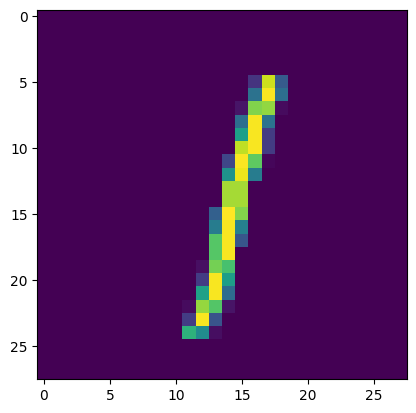

In [3]:
labels = mnist[:, 0]
digits = mnist[:, 1:]
img_size = 28
plt.imshow(digits[15].reshape(img_size, img_size))
plt.show()

## Task 1

In [4]:
# get descriptive statistics
df = pd.DataFrame(digits)
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [5]:
# remove constant columns (i.e. pixels with no ink)
var_thr = VarianceThreshold(threshold = 0)
var_thr.fit(df)
concol = [column for column in df.columns 
          if column not in df.columns[var_thr.get_support()]]
df = df.drop(concol,axis=1) # 708 columns remaining
df.describe()

,12,13,14,15,32,33,34,35,36,37,...,770,771,772,773,774,775,776,777,778,779
count,42000.00000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,...,42000.000000,42000.00000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000
mean,0.00300,0.011190,0.005143,0.000214,0.000381,0.001310,0.010548,0.027262,0.050905,0.066405,...,0.677857,0.60281,0.489238,0.340214,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857
std,0.56812,1.626927,1.053972,0.043916,0.078072,0.232634,1.131661,2.310396,3.121847,3.259128,...,11.254931,10.69603,9.480066,7.950251,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,116.00000,254.000000,216.000000,9.000000,16.000000,47.000000,157.000000,254.000000,255.000000,243.000000,...,255.000000,255.00000,255.000000,255.000000,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000


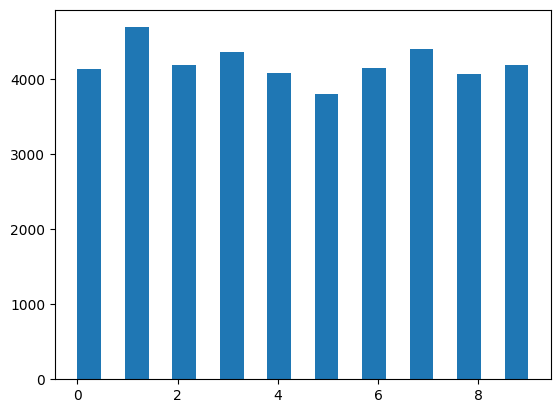

In [6]:
plt.hist(labels, bins=19)
plt.show()

In [7]:
# calculate the majority class
mode = stats.mode(labels)
print(mode[0]) # 1 is the majority class

[1]


/tmp/ipykernel_5968/1524035105.py:2: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(labels)


## Task 2

In [8]:
# calculate the ink per image
ink = np.array([sum(row) for row in digits])
# calculate the mean ink per digit class
ink_mean = [np.mean(ink[labels == i]) for i in range(10)]
# claclulate the std per digit class
ink_std = [np.std(ink[labels == i]) for i in range(10)]

In [9]:
labels_ink = np.column_stack((range(10), ink_mean, ink_std))
labels_ink[labels_ink[:, 1].argsort()]
# digit 0 and 1 will be the easiest to distinguish
# digit 4 and 9 as well as digit 2 and 8 and digit 3 and 6 will be especially hard to distinguish

array([[1.00000000e+00, 1.51884663e+04, 4.40946170e+03],
       [7.00000000e+00, 2.29312443e+04, 6.16834088e+03],
       [4.00000000e+00, 2.42327225e+04, 6.37463346e+03],
       [9.00000000e+00, 2.45537500e+04, 6.46523133e+03],
       [5.00000000e+00, 2.58359204e+04, 7.52660299e+03],
       [6.00000000e+00, 2.77349173e+04, 7.53050319e+03],
       [3.00000000e+00, 2.83201880e+04, 7.57410454e+03],
       [2.00000000e+00, 2.98710994e+04, 7.65300620e+03],
       [8.00000000e+00, 3.01841484e+04, 7.77739636e+03],
       [0.00000000e+00, 3.46324076e+04, 8.46189204e+03]])

In [10]:
# z-score standardize ink feature
from sklearn.preprocessing import scale
ink = scale(ink).reshape(-1, 1)

In [11]:
from sklearn.linear_model import LogisticRegression
mlr_ink = LogisticRegression(multi_class='multinomial', random_state=16).fit(ink, labels)

In [12]:
pred_labels = mlr_ink.predict(ink)
mlr_ink.score(ink, labels) # accuracy = 0.23

0.22680952380952382

## Task 3

In [19]:
import math
angle = np.zeros((len(digits), 1))

# calculate the angle of the first to the last non-zero pixel
for image in range(0, len(digits)):
    pixels = np.array(np.where(digits[image,:] > 0))
    first_pixel = pixels[:,0]
    last_pixel = pixels[:,-1]
    angle[image] = math.atan2(first_pixel,last_pixel) 

In [20]:
# calculate the mean angle per digit class
angle_mean = [np.mean(angle[labels == i]) for i in range(10)]
# claclulate the std per digit class
angle_std = [np.std(angle[labels == i]) for i in range(10)]

In [21]:
labels_angle = np.column_stack((range(10), angle_mean, angle_std))
labels_angle[labels_angle[:, 1].argsort()]
# digit 6 will be the easiest to distinguish
# digit 3 and 0 will be especially hard to distinguish

array([[6.        , 0.13480815, 0.02991747],
       [2.        , 0.18740269, 0.0502869 ],
       [1.        , 0.20070971, 0.01833319],
       [3.        , 0.20295307, 0.02845111],
       [0.        , 0.20633279, 0.03533058],
       [8.        , 0.21387058, 0.02416395],
       [4.        , 0.22139086, 0.02552286],
       [5.        , 0.23635413, 0.05788499],
       [9.        , 0.25286872, 0.01764282],
       [7.        , 0.26603898, 0.02351628]])

In [22]:
# z-score standardize ncomp feature
angle = scale(angle).reshape(-1, 1)

In [23]:
mlr_angle = LogisticRegression(multi_class='multinomial', random_state=16).fit(angle, labels)

In [24]:
pred_labels = mlr_angle.predict(angle)
mlr_angle.score(angle, labels) # accuracy = 0.34

0.3428809523809524

## Task 4

In [25]:
features = np.hstack((ink, angle))

In [26]:
mlr_both = LogisticRegression(multi_class='multinomial', random_state=16).fit(features, labels)

In [27]:
pred_labels = mlr_both.predict(features)
mlr_both.score(features, labels) # accuracy = 0.40

0.39804761904761904

## Task 5

## Multinomial Logistic Regression

In [28]:
#!pip install opencv-python

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  
mnist_scaled = scaler.fit_transform(df[df.columns[1:]])
mnist_scaled.shape

(42000, 707)

In [30]:
mnist_scaled = np.column_stack((labels, mnist_scaled))
mnist_scaled.shape

(42000, 708)

In [31]:
import random
random.seed(123)

index = np.random.choice(mnist_scaled.shape[0], 5000, replace=False)
train = mnist_scaled[index]

In [32]:
train_labels = train[:, 0]
train_digits = train[:, 1:]

In [33]:
train_digits.shape

(5000, 707)

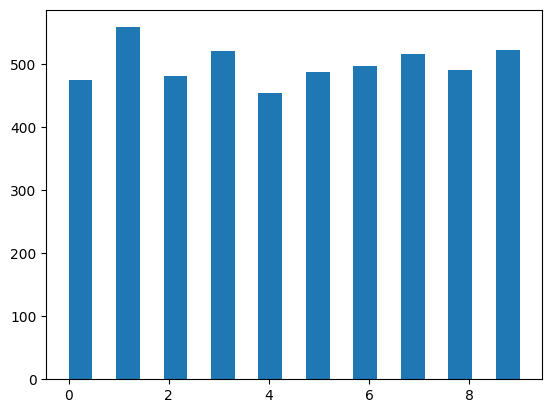

In [34]:
plt.hist(train_labels, bins=19)
plt.show()

In [35]:
test_data = np.delete(mnist_scaled, index, axis=0)
test_labels = test_data[:, 0]
test_digits = test_data[:, 1:]

In [18]:
np.logspace(-3,3,7)

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
param = {'C':np.logspace(-3,3,7), 'penalty':['l1'], 'solver':['saga']}
mlr = LogisticRegression(multi_class='multinomial', max_iter=10_000, random_state=123)
mlr_cv = GridSearchCV(mlr, param, cv=5, scoring='accuracy')
mlr_cv.fit(train_digits, train_labels)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000,
                                          multi_class='multinomial',
                                          random_state=123),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1'], 'solver': ['saga']},
             scoring='accuracy')

In [35]:
print("tuned hpyerparameters :(best parameters) ", mlr_cv.best_params_)
print("best score :", round(mlr_cv.best_score_, 3)) # accuracy = 0.897

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
best score : 0.897


In [36]:
res = pd.DataFrame(mlr_cv.cv_results_)
res.iloc[:,res.columns.str.contains("split[0-9]_test_score|params",regex=True)]

,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score
0,"{'C': 0.001, 'penalty': 'l1', 'solver': 'saga'}",0.113,0.113,0.113,0.113,0.113
1,"{'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}",0.819,0.813,0.817,0.831,0.803
2,"{'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}",0.895,0.901,0.896,0.903,0.891
3,"{'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}",0.891,0.896,0.890,0.896,0.888
4,"{'C': 10.0, 'penalty': 'l1', 'solver': 'saga'}",0.893,0.888,0.888,0.895,0.887
5,"{'C': 100.0, 'penalty': 'l1', 'solver': 'saga'}",0.893,0.888,0.885,0.892,0.887
6,"{'C': 1000.0, 'penalty': 'l1', 'solver': 'saga'}",0.893,0.888,0.884,0.891,0.887


In [58]:
pred_mlr = mlr_cv.predict(test_digits)
acc_mlr = mlr_cv.score(test_digits, test_labels) 
acc_mlr # accuracy = 0.892

0.8924324324324324

In [59]:
# get confusion matrix
from sklearn import metrics

cnf_mlr = metrics.confusion_matrix(test_labels, pred_mlr)
cnf_mlr

array([[3443,    1,    9,   12,   10,   56,   34,    6,   27,    3],
       [   0, 4008,   12,   17,    2,   19,    7,   13,   67,    3],
       [  29,   42, 3204,   64,   82,   15,   56,   64,   92,   24],
       [  16,   31,  108, 3295,    2,  172,   24,   59,   87,   55],
       [  13,   31,   25,    9, 3212,    6,   18,   13,   31,  248],
       [  53,   37,   37,  148,   48, 2798,   78,   38,  107,   30],
       [  26,   16,   56,    3,   52,   83, 3381,    2,   23,    3],
       [  20,   48,   46,   32,   40,    9,    6, 3520,   11,  104],
       [  26,  101,   41,  105,   35,  126,   36,   19, 3006,   81],
       [  27,   30,   18,   71,  132,   28,    2,  197,   35, 3153]])

In [47]:
print(metrics.classification_report(test_labels, pred_mlr)) 

              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95      3601
         1.0       0.92      0.97      0.94      4148
         2.0       0.90      0.87      0.89      3672
         3.0       0.88      0.86      0.87      3849
         4.0       0.89      0.89      0.89      3606
         5.0       0.84      0.83      0.84      3374
         6.0       0.93      0.93      0.93      3645
         7.0       0.90      0.92      0.91      3836
         8.0       0.86      0.84      0.85      3576
         9.0       0.85      0.85      0.85      3693

    accuracy                           0.89     37000
   macro avg       0.89      0.89      0.89     37000
weighted avg       0.89      0.89      0.89     37000



In [1]:
test = np.delete(digits, index, axis=0)

NameError: name 'np' is not defined

In [253]:
wrng_pred_mlr = [i for i in range(len(test_labels)) if test_labels[i] != pred_mlr[i]]
wrng_pred_mlr

[2,
 14,
 17,
 30,
 36,
 39,
 52,
 54,
 55,
 66,
 68,
 77,
 81,
 82,
 92,
 107,
 113,
 116,
 137,
 144,
 146,
 148,
 161,
 162,
 163,
 168,
 188,
 189,
 204,
 208,
 211,
 218,
 229,
 245,
 267,
 291,
 309,
 320,
 325,
 329,
 335,
 351,
 372,
 386,
 395,
 399,
 404,
 408,
 410,
 411,
 417,
 440,
 444,
 458,
 459,
 467,
 476,
 483,
 493,
 495,
 496,
 499,
 504,
 506,
 534,
 546,
 561,
 564,
 565,
 566,
 577,
 584,
 585,
 596,
 614,
 627,
 635,
 681,
 701,
 707,
 715,
 722,
 750,
 756,
 759,
 763,
 767,
 782,
 790,
 793,
 808,
 814,
 815,
 887,
 889,
 891,
 894,
 895,
 905,
 922,
 932,
 934,
 937,
 953,
 981,
 990,
 997,
 1000,
 1003,
 1004,
 1005,
 1025,
 1029,
 1035,
 1041,
 1042,
 1050,
 1065,
 1079,
 1083,
 1085,
 1106,
 1124,
 1130,
 1151,
 1204,
 1211,
 1212,
 1229,
 1235,
 1240,
 1242,
 1245,
 1260,
 1294,
 1305,
 1315,
 1330,
 1340,
 1342,
 1361,
 1401,
 1408,
 1424,
 1427,
 1430,
 1443,
 1464,
 1482,
 1490,
 1506,
 1521,
 1522,
 1528,
 1538,
 1544,
 1551,
 1553,
 1562,
 1570,
 15

In [258]:
test_labels[17]

5.0

In [259]:
pred_mlr[17]

6.0

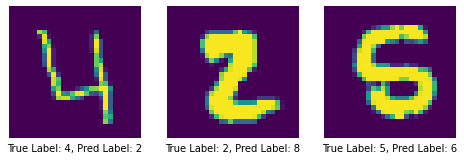

In [260]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(8,8))
gs1 = gridspec.GridSpec(1, 3)

ax1 = plt.subplot(gs1[0])
ax1.imshow(test[2].reshape(img_size, img_size))
ax2 = plt.subplot(gs1[1])
ax2.imshow(test[14].reshape(img_size, img_size))
ax3 = plt.subplot(gs1[2])
ax3.imshow(test[17].reshape(img_size, img_size))

ax1.axis('off')
ax2.axis('off')
ax3.axis('off')

ax1.text(0.5,-0.1, "True Label: 4, Pred Label: 2", size=10, ha="center", 
         transform=ax1.transAxes)
ax2.text(0.5,-0.1, "True Label: 2, Pred Label: 8", size=10, ha="center", 
         transform=ax2.transAxes)
ax3.text(0.5,-0.1, "True Label: 5, Pred Label: 6", size=10, ha="center", 
         transform=ax3.transAxes)

plt.show()

In [48]:
import pickle

with open("mlr_converged.pickle", "wb") as f:
    pickle.dump(mlr_cv, f)

In [63]:
with open("mlr_converged.pickle", "rb") as f:
    mlr_pickle = pickle.load(f)

In [64]:
pred_mlr_pickle = mlr_pickle.predict(test_digits)
acc_mlr_pickle = mlr_pickle.score(test_digits, test_labels) 
acc_mlr_pickle # accuracy = 0.892

0.8924324324324324

In [65]:
cnf_mlr_pickle = metrics.confusion_matrix(test_labels, pred_mlr_pickle)
cnf_mlr_pickle

array([[3443,    1,    9,   12,   10,   56,   34,    6,   27,    3],
       [   0, 4008,   12,   17,    2,   19,    7,   13,   67,    3],
       [  29,   42, 3204,   64,   82,   15,   56,   64,   92,   24],
       [  16,   31,  108, 3295,    2,  172,   24,   59,   87,   55],
       [  13,   31,   25,    9, 3212,    6,   18,   13,   31,  248],
       [  53,   37,   37,  148,   48, 2798,   78,   38,  107,   30],
       [  26,   16,   56,    3,   52,   83, 3381,    2,   23,    3],
       [  20,   48,   46,   32,   40,    9,    6, 3520,   11,  104],
       [  26,  101,   41,  105,   35,  126,   36,   19, 3006,   81],
       [  27,   30,   18,   71,  132,   28,    2,  197,   35, 3153]])

## Support Vector Machine

In [34]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

param = {'C':np.logspace(-3,3,7), 
         'kernel':('linear','poly','rbf','sigmoid')}
svm = svm.SVC(random_state=123, verbose=1)
svm_cv = GridSearchCV(svm, param, cv=5, scoring='accuracy')
svm_cv.fit(train_digits, train_labels)

[LibSVM]*
optimization finished, #iter = 111
obj = -0.026219, rho = -0.214955
nSV = 65, nBSV = 30
*
optimization finished, #iter = 250
obj = -0.072706, rho = 0.411729
nSV = 138, nBSV = 87
*
optimization finished, #iter = 336
obj = -0.062974, rho = 0.267419
nSV = 124, nBSV = 72
*
optimization finished, #iter = 188
obj = -0.043773, rho = 0.033116
nSV = 96, nBSV = 53
*
optimization finished, #iter = 365
obj = -0.088605, rho = 0.657354
nSV = 170, nBSV = 100
*
optimization finished, #iter = 240
obj = -0.075958, rho = 0.019617
nSV = 143, nBSV = 96
*
optimization finished, #iter = 180
obj = -0.039989, rho = -0.000221
nSV = 95, nBSV = 49
*
optimization finished, #iter = 262
obj = -0.065815, rho = 0.442103
nSV = 133, nBSV = 75
*
optimization finished, #iter = 149
obj = -0.045048, rho = 0.081799
nSV = 94, nBSV = 59
*
optimization finished, #iter = 223
obj = -0.076836, rho = 0.715334
nSV = 145, nBSV = 97
*
optimization finished, #iter = 163
obj = -0.069480, rho = 0.644114
nSV = 130, nBSV = 87
*
o

[LibSVM]*
optimization finished, #iter = 95
obj = -0.024186, rho = -0.212432
nSV = 64, nBSV = 30
*
optimization finished, #iter = 310
obj = -0.066294, rho = 0.360432
nSV = 134, nBSV = 78
*
optimization finished, #iter = 259
obj = -0.064379, rho = 0.229361
nSV = 129, nBSV = 81
*
optimization finished, #iter = 177
obj = -0.044844, rho = 0.017150
nSV = 99, nBSV = 52
*
optimization finished, #iter = 401
obj = -0.091651, rho = 0.588352
nSV = 165, nBSV = 110
*
optimization finished, #iter = 229
obj = -0.072453, rho = 0.052831
nSV = 137, nBSV = 92
*
optimization finished, #iter = 200
obj = -0.039627, rho = -0.035271
nSV = 100, nBSV = 44
*
optimization finished, #iter = 281
obj = -0.068116, rho = 0.452231
nSV = 134, nBSV = 81
*
optimization finished, #iter = 209
obj = -0.048807, rho = 0.158470
nSV = 105, nBSV = 57
*
optimization finished, #iter = 204
obj = -0.070741, rho = 0.708882
nSV = 141, nBSV = 91
*
optimization finished, #iter = 191
obj = -0.071937, rho = 0.667965
nSV = 134, nBSV = 94
*


[LibSVM]*
optimization finished, #iter = 112
obj = -0.024495, rho = -0.140357
nSV = 64, nBSV = 29
*
optimization finished, #iter = 239
obj = -0.065245, rho = 0.361300
nSV = 136, nBSV = 81
*
optimization finished, #iter = 240
obj = -0.059377, rho = 0.293064
nSV = 122, nBSV = 72
*
optimization finished, #iter = 225
obj = -0.042609, rho = 0.072199
nSV = 96, nBSV = 52
*
optimization finished, #iter = 234
obj = -0.084957, rho = 0.646822
nSV = 154, nBSV = 109
*
optimization finished, #iter = 275
obj = -0.067566, rho = 0.033101
nSV = 130, nBSV = 83
*
optimization finished, #iter = 243
obj = -0.038269, rho = -0.001608
nSV = 94, nBSV = 47
*
optimization finished, #iter = 221
obj = -0.066968, rho = 0.495117
nSV = 125, nBSV = 80
*
optimization finished, #iter = 191
obj = -0.045124, rho = 0.156284
nSV = 103, nBSV = 57
*
optimization finished, #iter = 233
obj = -0.078941, rho = 0.729716
nSV = 152, nBSV = 102
*
optimization finished, #iter = 208
obj = -0.073006, rho = 0.660961
nSV = 136, nBSV = 94
*

[LibSVM]*
optimization finished, #iter = 446
obj = -0.837793, rho = 0.994534
nSV = 852, nBSV = 846
*
optimization finished, #iter = 422
obj = -0.788961, rho = -0.901201
nSV = 807, nBSV = 800
*
optimization finished, #iter = 420
obj = -0.791612, rho = -0.898208
nSV = 808, nBSV = 803
*
optimization finished, #iter = 388
obj = -0.739667, rho = -0.944523
nSV = 749, nBSV = 738
*
optimization finished, #iter = 376
obj = -0.666775, rho = -0.970108
nSV = 680, nBSV = 661
*
optimization finished, #iter = 421
obj = -0.772288, rho = -0.922524
nSV = 790, nBSV = 781
*
optimization finished, #iter = 464
obj = -0.836864, rho = 0.943134
nSV = 858, nBSV = 842
*
optimization finished, #iter = 407
obj = -0.772712, rho = -0.922708
nSV = 784, nBSV = 775
*
optimization finished, #iter = 411
obj = -0.785517, rho = -0.909898
nSV = 796, nBSV = 788
*
optimization finished, #iter = 475
obj = -0.793804, rho = -0.996096
nSV = 808, nBSV = 800
*
optimization finished, #iter = 496
obj = -0.796809, rho = -0.996228
nSV 

[LibSVM]*
optimization finished, #iter = 433
obj = -0.837264, rho = 0.993801
nSV = 851, nBSV = 846
*
optimization finished, #iter = 430
obj = -0.787727, rho = -0.895435
nSV = 809, nBSV = 800
*
optimization finished, #iter = 423
obj = -0.788852, rho = -0.893257
nSV = 807, nBSV = 799
*
optimization finished, #iter = 396
obj = -0.741584, rho = -0.942291
nSV = 752, nBSV = 739
*
optimization finished, #iter = 359
obj = -0.667424, rho = -0.968943
nSV = 681, nBSV = 667
*
optimization finished, #iter = 424
obj = -0.772477, rho = -0.917517
nSV = 791, nBSV = 781
*
optimization finished, #iter = 466
obj = -0.836398, rho = 0.950112
nSV = 863, nBSV = 843
*
optimization finished, #iter = 415
obj = -0.770762, rho = -0.920440
nSV = 784, nBSV = 772
*
optimization finished, #iter = 421
obj = -0.785249, rho = -0.901850
nSV = 797, nBSV = 787
*
optimization finished, #iter = 417
obj = -0.792706, rho = -0.995744
nSV = 807, nBSV = 800
*
optimization finished, #iter = 411
obj = -0.794080, rho = -0.995954
nSV 

[LibSVM]*
optimization finished, #iter = 425
obj = -0.806442, rho = 0.788148
nSV = 848, nBSV = 848
*
optimization finished, #iter = 404
obj = -0.797013, rho = -0.930828
nSV = 808, nBSV = 808
*
optimization finished, #iter = 402
obj = -0.791130, rho = -0.944923
nSV = 804, nBSV = 804
*
optimization finished, #iter = 373
obj = -0.731484, rho = -0.962066
nSV = 746, nBSV = 746
*
optimization finished, #iter = 337
obj = -0.668202, rho = -0.971398
nSV = 674, nBSV = 674
*
optimization finished, #iter = 393
obj = -0.773739, rho = -0.947684
nSV = 786, nBSV = 786
*
optimization finished, #iter = 452
obj = -0.829476, rho = 0.925960
nSV = 848, nBSV = 848
*
optimization finished, #iter = 390
obj = -0.766281, rho = -0.959121
nSV = 780, nBSV = 780
*
optimization finished, #iter = 396
obj = -0.773505, rho = -0.950371
nSV = 792, nBSV = 792
*
optimization finished, #iter = 404
obj = -0.782969, rho = -0.816077
nSV = 808, nBSV = 808
*
optimization finished, #iter = 403
obj = -0.782324, rho = -0.848672
nSV 

[LibSVM]*
optimization finished, #iter = 426
obj = -0.808186, rho = 0.786147
nSV = 850, nBSV = 850
*
optimization finished, #iter = 404
obj = -0.797325, rho = -0.932966
nSV = 808, nBSV = 808
*
optimization finished, #iter = 402
obj = -0.791501, rho = -0.947477
nSV = 804, nBSV = 804
*
optimization finished, #iter = 373
obj = -0.731826, rho = -0.963881
nSV = 746, nBSV = 746
*
optimization finished, #iter = 337
obj = -0.668381, rho = -0.972436
nSV = 674, nBSV = 674
*
optimization finished, #iter = 394
obj = -0.775779, rho = -0.947506
nSV = 788, nBSV = 788
*
optimization finished, #iter = 452
obj = -0.831661, rho = 0.925881
nSV = 850, nBSV = 850
*
optimization finished, #iter = 389
obj = -0.764768, rho = -0.962427
nSV = 778, nBSV = 778
*
optimization finished, #iter = 396
obj = -0.774519, rho = -0.953150
nSV = 792, nBSV = 792
*
optimization finished, #iter = 404
obj = -0.782455, rho = -0.816526
nSV = 808, nBSV = 808
*
optimization finished, #iter = 403
obj = -0.782210, rho = -0.849185
nSV 

[LibSVM]*
optimization finished, #iter = 426
obj = -0.808293, rho = 0.789594
nSV = 850, nBSV = 850
*
optimization finished, #iter = 404
obj = -0.796583, rho = -0.927323
nSV = 808, nBSV = 808
*
optimization finished, #iter = 401
obj = -0.788980, rho = -0.943728
nSV = 802, nBSV = 802
*
optimization finished, #iter = 373
obj = -0.731832, rho = -0.960330
nSV = 746, nBSV = 746
*
optimization finished, #iter = 337
obj = -0.667992, rho = -0.969616
nSV = 674, nBSV = 674
*
optimization finished, #iter = 393
obj = -0.773659, rho = -0.944815
nSV = 786, nBSV = 786
*
optimization finished, #iter = 452
obj = -0.830712, rho = 0.923281
nSV = 850, nBSV = 850
*
optimization finished, #iter = 390
obj = -0.766431, rho = -0.957663
nSV = 780, nBSV = 780
*
optimization finished, #iter = 396
obj = -0.773934, rho = -0.948152
nSV = 792, nBSV = 792
*
optimization finished, #iter = 404
obj = -0.783339, rho = -0.819229
nSV = 808, nBSV = 808
*
optimization finished, #iter = 401
obj = -0.780907, rho = -0.852797
nSV 

[LibSVM]*
optimization finished, #iter = 428
obj = -0.796605, rho = 0.869980
nSV = 850, nBSV = 850
*
optimization finished, #iter = 404
obj = -0.780694, rho = -0.844698
nSV = 808, nBSV = 808
*
optimization finished, #iter = 402
obj = -0.777291, rho = -0.835440
nSV = 804, nBSV = 804
*
optimization finished, #iter = 372
obj = -0.720363, rho = -0.860530
nSV = 744, nBSV = 744
*
optimization finished, #iter = 337
obj = -0.661571, rho = -0.919600
nSV = 672, nBSV = 672
*
optimization finished, #iter = 394
obj = -0.762561, rho = -0.855188
nSV = 788, nBSV = 788
*
optimization finished, #iter = 444
obj = -0.808340, rho = 0.885826
nSV = 850, nBSV = 850
*
optimization finished, #iter = 390
obj = -0.757516, rho = -0.851177
nSV = 780, nBSV = 780
*
optimization finished, #iter = 396
obj = -0.760307, rho = -0.817329
nSV = 792, nBSV = 792
*
optimization finished, #iter = 404
obj = -0.785306, rho = -0.919989
nSV = 808, nBSV = 808
*
optimization finished, #iter = 403
obj = -0.783750, rho = -0.927362
nSV 

[LibSVM]*
optimization finished, #iter = 427
obj = -0.796429, rho = 0.867603
nSV = 850, nBSV = 850
*
optimization finished, #iter = 404
obj = -0.781185, rho = -0.843176
nSV = 808, nBSV = 808
*
optimization finished, #iter = 401
obj = -0.775101, rho = -0.835587
nSV = 802, nBSV = 802
*
optimization finished, #iter = 373
obj = -0.722570, rho = -0.858612
nSV = 746, nBSV = 746
*
optimization finished, #iter = 337
obj = -0.663292, rho = -0.917867
nSV = 674, nBSV = 674
*
optimization finished, #iter = 394
obj = -0.762429, rho = -0.852496
nSV = 788, nBSV = 788
*
optimization finished, #iter = 442
obj = -0.807910, rho = 0.883882
nSV = 850, nBSV = 850
*
optimization finished, #iter = 389
obj = -0.755329, rho = -0.855410
nSV = 778, nBSV = 778
*
optimization finished, #iter = 396
obj = -0.760100, rho = -0.815250
nSV = 792, nBSV = 792
*
optimization finished, #iter = 404
obj = -0.786212, rho = -0.920577
nSV = 808, nBSV = 808
*
optimization finished, #iter = 401
obj = -0.781483, rho = -0.926297
nSV 

[LibSVM]*
optimization finished, #iter = 149
obj = -0.041141, rho = -0.265126
nSV = 41, nBSV = 1
*
optimization finished, #iter = 579
obj = -0.161416, rho = 0.535652
nSV = 88, nBSV = 9
*
optimization finished, #iter = 437
obj = -0.138937, rho = 0.225597
nSV = 72, nBSV = 4
*
optimization finished, #iter = 369
obj = -0.061074, rho = -0.059922
nSV = 59, nBSV = 0
*.*
optimization finished, #iter = 908
obj = -0.212664, rho = 0.706945
nSV = 104, nBSV = 11
*
optimization finished, #iter = 626
obj = -0.201312, rho = 0.262612
nSV = 86, nBSV = 14
*
optimization finished, #iter = 337
obj = -0.052507, rho = 0.039099
nSV = 59, nBSV = 0
*
optimization finished, #iter = 561
obj = -0.163396, rho = 0.682254
nSV = 81, nBSV = 8
*
optimization finished, #iter = 284
obj = -0.082708, rho = 0.291002
nSV = 51, nBSV = 3
*
optimization finished, #iter = 534
obj = -0.205871, rho = 1.185938
nSV = 89, nBSV = 14
*
optimization finished, #iter = 384
obj = -0.155709, rho = 1.005914
nSV = 72, nBSV = 5
*
optimization f

*
optimization finished, #iter = 691
obj = -0.217869, rho = 0.829810
nSV = 95, nBSV = 9
*
optimization finished, #iter = 639
obj = -0.180322, rho = 0.200724
nSV = 89, nBSV = 10
*
optimization finished, #iter = 367
obj = -0.052791, rho = 0.012588
nSV = 65, nBSV = 0
*
optimization finished, #iter = 456
obj = -0.172986, rho = 0.691192
nSV = 83, nBSV = 11
*
optimization finished, #iter = 267
obj = -0.091786, rho = 0.371290
nSV = 56, nBSV = 2
*
optimization finished, #iter = 437
obj = -0.172005, rho = 0.921893
nSV = 88, nBSV = 10
*
optimization finished, #iter = 486
obj = -0.173119, rho = 0.990503
nSV = 81, nBSV = 8
*
optimization finished, #iter = 244
obj = -0.090254, rho = 0.376299
nSV = 52, nBSV = 3
*
optimization finished, #iter = 318
obj = -0.103051, rho = 0.842559
nSV = 66, nBSV = 0
*
optimization finished, #iter = 280
obj = -0.097187, rho = 0.331509
nSV = 57, nBSV = 4
*
optimization finished, #iter = 270
obj = -0.130640, rho = 0.509994
nSV = 62, nBSV = 11
*
optimization finished, #it

*
optimization finished, #iter = 712
obj = -0.140669, rho = 0.264705
nSV = 83, nBSV = 5
*
optimization finished, #iter = 269
obj = -0.054534, rho = 0.046077
nSV = 59, nBSV = 0
*
optimization finished, #iter = 484
obj = -0.172312, rho = 0.733557
nSV = 77, nBSV = 10
*
optimization finished, #iter = 235
obj = -0.082516, rho = 0.369729
nSV = 53, nBSV = 2
*
optimization finished, #iter = 455
obj = -0.216138, rho = 1.068222
nSV = 87, nBSV = 15
*
optimization finished, #iter = 428
obj = -0.175359, rho = 0.996747
nSV = 76, nBSV = 9
*
optimization finished, #iter = 256
obj = -0.097420, rho = 0.371832
nSV = 56, nBSV = 4
*
optimization finished, #iter = 346
obj = -0.127199, rho = 0.966755
nSV = 68, nBSV = 4
*
optimization finished, #iter = 433
obj = -0.106981, rho = 0.326268
nSV = 60, nBSV = 3
*
optimization finished, #iter = 231
obj = -0.132455, rho = 0.558108
nSV = 64, nBSV = 9
*
optimization finished, #iter = 554
obj = -0.336060, rho = 1.818219
nSV = 96, nBSV = 31
*
optimization finished, #ite

*
optimization finished, #iter = 455
obj = -6.980927, rho = -0.371454
nSV = 776, nBSV = 751
*
optimization finished, #iter = 485
obj = -7.395067, rho = 0.620713
nSV = 850, nBSV = 827
*
optimization finished, #iter = 413
obj = -7.237881, rho = -0.261600
nSV = 781, nBSV = 769
*
optimization finished, #iter = 416
obj = -7.276084, rho = -0.110509
nSV = 795, nBSV = 787
*
optimization finished, #iter = 524
obj = -7.421837, rho = -0.964632
nSV = 800, nBSV = 773
*
optimization finished, #iter = 444
obj = -7.654756, rho = -0.963844
nSV = 798, nBSV = 783
*
optimization finished, #iter = 417
obj = -7.314617, rho = -0.965626
nSV = 749, nBSV = 737
*
optimization finished, #iter = 375
obj = -6.547066, rho = -0.972600
nSV = 678, nBSV = 662
*
optimization finished, #iter = 468
obj = -7.279769, rho = -0.964248
nSV = 782, nBSV = 754
*
optimization finished, #iter = 515
obj = -8.264235, rho = 0.240942
nSV = 867, nBSV = 848
*
optimization finished, #iter = 431
obj = -7.625083, rho = -0.965146
nSV = 785, n

*
optimization finished, #iter = 377
obj = -6.397884, rho = -0.702472
nSV = 677, nBSV = 662
*
optimization finished, #iter = 439
obj = -6.986913, rho = -0.329866
nSV = 780, nBSV = 757
*
optimization finished, #iter = 498
obj = -7.356239, rho = 0.670346
nSV = 854, nBSV = 825
*
optimization finished, #iter = 422
obj = -7.227539, rho = -0.238790
nSV = 781, nBSV = 767
*
optimization finished, #iter = 422
obj = -7.251212, rho = -0.044001
nSV = 796, nBSV = 784
*
optimization finished, #iter = 473
obj = -7.416451, rho = -0.961978
nSV = 797, nBSV = 772
*
optimization finished, #iter = 450
obj = -7.600941, rho = -0.961167
nSV = 797, nBSV = 778
*
optimization finished, #iter = 398
obj = -7.330188, rho = -0.962876
nSV = 752, nBSV = 741
*
optimization finished, #iter = 380
obj = -6.541307, rho = -0.970614
nSV = 680, nBSV = 662
*
optimization finished, #iter = 448
obj = -7.306397, rho = -0.961205
nSV = 782, nBSV = 756
*
optimization finished, #iter = 488
obj = -8.273862, rho = 0.250194
nSV = 867, n

*
optimization finished, #iter = 376
obj = -6.008418, rho = -0.620309
nSV = 749, nBSV = 743
*
optimization finished, #iter = 345
obj = -6.160178, rho = -0.713595
nSV = 679, nBSV = 667
*
optimization finished, #iter = 395
obj = -6.633940, rho = -0.476651
nSV = 788, nBSV = 784
*
optimization finished, #iter = 428
obj = -6.627648, rho = 0.259876
nSV = 850, nBSV = 847
*
optimization finished, #iter = 392
obj = -6.428140, rho = -0.591327
nSV = 782, nBSV = 778
*
optimization finished, #iter = 398
obj = -6.070486, rho = -0.503272
nSV = 793, nBSV = 790
*
optimization finished, #iter = 405
obj = -5.576931, rho = 0.839186
nSV = 809, nBSV = 807
*
optimization finished, #iter = 403
obj = -5.872435, rho = 0.513284
nSV = 804, nBSV = 804
*
optimization finished, #iter = 374
obj = -5.641064, rho = 0.158358
nSV = 746, nBSV = 746
*
optimization finished, #iter = 338
obj = -5.395649, rho = 0.163487
nSV = 674, nBSV = 674
*
optimization finished, #iter = 394
obj = -5.400024, rho = 0.585399
nSV = 787, nBSV 

*
optimization finished, #iter = 402
obj = -6.790078, rho = -0.474769
nSV = 804, nBSV = 804
*
optimization finished, #iter = 377
obj = -6.042634, rho = -0.638696
nSV = 749, nBSV = 743
*
optimization finished, #iter = 339
obj = -6.178137, rho = -0.724368
nSV = 676, nBSV = 672
*
optimization finished, #iter = 398
obj = -6.657881, rho = -0.475421
nSV = 791, nBSV = 786
*
optimization finished, #iter = 428
obj = -6.666150, rho = 0.258687
nSV = 852, nBSV = 847
*
optimization finished, #iter = 391
obj = -6.456823, rho = -0.624844
nSV = 780, nBSV = 777
*
optimization finished, #iter = 397
obj = -6.171908, rho = -0.531503
nSV = 793, nBSV = 791
*
optimization finished, #iter = 405
obj = -5.525512, rho = 0.833418
nSV = 808, nBSV = 808
*
optimization finished, #iter = 404
obj = -5.861013, rho = 0.508151
nSV = 805, nBSV = 803
*
optimization finished, #iter = 375
obj = -5.625844, rho = 0.169243
nSV = 747, nBSV = 745
*
optimization finished, #iter = 340
obj = -5.331664, rho = 0.182556
nSV = 676, nBSV

*
optimization finished, #iter = 406
obj = -6.938316, rho = -0.272765
nSV = 809, nBSV = 806
*
optimization finished, #iter = 403
obj = -6.718018, rho = -0.437119
nSV = 804, nBSV = 800
*
optimization finished, #iter = 378
obj = -6.043190, rho = -0.603282
nSV = 750, nBSV = 741
*
optimization finished, #iter = 340
obj = -6.139270, rho = -0.696498
nSV = 676, nBSV = 672
*
optimization finished, #iter = 394
obj = -6.625918, rho = -0.448153
nSV = 787, nBSV = 785
*
optimization finished, #iter = 425
obj = -6.571250, rho = 0.232805
nSV = 850, nBSV = 850
*
optimization finished, #iter = 392
obj = -6.443097, rho = -0.576462
nSV = 782, nBSV = 778
*
optimization finished, #iter = 398
obj = -6.113365, rho = -0.481936
nSV = 794, nBSV = 791
*
optimization finished, #iter = 404
obj = -5.613920, rho = 0.807709
nSV = 808, nBSV = 808
*
optimization finished, #iter = 401
obj = -5.910679, rho = 0.472025
nSV = 802, nBSV = 802
*
optimization finished, #iter = 373
obj = -5.628744, rho = 0.179549
nSV = 746, nBS

*
optimization finished, #iter = 375
obj = -5.469209, rho = 0.216985
nSV = 746, nBSV = 746
*
optimization finished, #iter = 377
obj = -5.434825, rho = 0.341642
nSV = 754, nBSV = 752
*
optimization finished, #iter = 364
obj = -5.084348, rho = 0.310249
nSV = 728, nBSV = 726
*
optimization finished, #iter = 337
obj = -5.677117, rho = -0.195630
nSV = 673, nBSV = 671
*
optimization finished, #iter = 373
obj = -5.395857, rho = 0.171284
nSV = 743, nBSV = 740
*
optimization finished, #iter = 358
obj = -4.803967, rho = 0.277896
nSV = 708, nBSV = 703
*
optimization finished, #iter = 388
obj = -5.555219, rho = 0.417078
nSV = 772, nBSV = 772
*
optimization finished, #iter = 358
obj = -4.897605, rho = 0.311485
nSV = 711, nBSV = 706
*
optimization finished, #iter = 394
obj = -5.832779, rho = -0.250462
nSV = 788, nBSV = 786
*
optimization finished, #iter = 403
obj = -6.015206, rho = -0.277801
nSV = 803, nBSV = 801
*
optimization finished, #iter = 372
obj = -5.557865, rho = -0.239030
nSV = 744, nBSV =

*
optimization finished, #iter = 377
obj = -5.503966, rho = 0.237782
nSV = 750, nBSV = 748
*
optimization finished, #iter = 379
obj = -5.400364, rho = 0.334684
nSV = 753, nBSV = 750
*
optimization finished, #iter = 368
obj = -5.125615, rho = 0.308147
nSV = 731, nBSV = 727
*
optimization finished, #iter = 338
obj = -5.669189, rho = -0.178761
nSV = 675, nBSV = 673
*
optimization finished, #iter = 373
obj = -5.388106, rho = 0.179554
nSV = 745, nBSV = 742
*
optimization finished, #iter = 355
obj = -4.779698, rho = 0.263553
nSV = 707, nBSV = 700
*
optimization finished, #iter = 384
obj = -5.517119, rho = 0.380768
nSV = 766, nBSV = 764
*
optimization finished, #iter = 355
obj = -4.888092, rho = 0.317388
nSV = 709, nBSV = 706
*
optimization finished, #iter = 395
obj = -5.915381, rho = -0.248496
nSV = 790, nBSV = 790
*
optimization finished, #iter = 401
obj = -5.968977, rho = -0.270116
nSV = 800, nBSV = 800
*
optimization finished, #iter = 373
obj = -5.545635, rho = -0.210862
nSV = 746, nBSV =

*.*
optimization finished, #iter = 1083
obj = -0.220543, rho = 0.728786
nSV = 96, nBSV = 0
*
optimization finished, #iter = 746
obj = -0.226048, rho = 0.397858
nSV = 79, nBSV = 0
*
optimization finished, #iter = 337
obj = -0.052507, rho = 0.039099
nSV = 59, nBSV = 0
*
optimization finished, #iter = 569
obj = -0.196140, rho = 0.793021
nSV = 71, nBSV = 0
*
optimization finished, #iter = 326
obj = -0.086706, rho = 0.344595
nSV = 55, nBSV = 0
*
optimization finished, #iter = 672
obj = -0.244049, rho = 1.288465
nSV = 82, nBSV = 0
*
optimization finished, #iter = 423
obj = -0.165034, rho = 1.042946
nSV = 68, nBSV = 0
*
optimization finished, #iter = 334
obj = -0.156047, rho = 0.300292
nSV = 52, nBSV = 0
*
optimization finished, #iter = 360
obj = -0.132943, rho = 1.061580
nSV = 71, nBSV = 0
*
optimization finished, #iter = 337
obj = -0.094333, rho = 0.394742
nSV = 56, nBSV = 0
*
optimization finished, #iter = 277
obj = -0.234963, rho = 0.687620
nSV = 57, nBSV = 0
*
optimization finished, #ite

*
optimization finished, #iter = 562
obj = -0.210744, rho = 0.781015
nSV = 81, nBSV = 0
*
optimization finished, #iter = 296
obj = -0.094766, rho = 0.424826
nSV = 56, nBSV = 0
*
optimization finished, #iter = 471
obj = -0.207216, rho = 1.095258
nSV = 79, nBSV = 0
*
optimization finished, #iter = 538
obj = -0.204347, rho = 1.026340
nSV = 72, nBSV = 0
*
optimization finished, #iter = 261
obj = -0.101444, rho = 0.584116
nSV = 51, nBSV = 0
*
optimization finished, #iter = 318
obj = -0.103051, rho = 0.842559
nSV = 66, nBSV = 0
*
optimization finished, #iter = 327
obj = -0.120381, rho = 0.296129
nSV = 57, nBSV = 0
*
optimization finished, #iter = 277
obj = -0.185436, rho = 0.734412
nSV = 55, nBSV = 0
*
optimization finished, #iter = 668
obj = -0.384220, rho = 2.046006
nSV = 71, nBSV = 0
*
optimization finished, #iter = 237
obj = -0.148638, rho = 0.269658
nSV = 46, nBSV = 0
.*.*
optimization finished, #iter = 1887
obj = -0.490917, rho = -0.089977
nSV = 125, nBSV = 0
*.*
optimization finished,

*
optimization finished, #iter = 462
obj = -0.195898, rho = 1.004733
nSV = 69, nBSV = 0
*
optimization finished, #iter = 294
obj = -0.122674, rho = 0.298567
nSV = 48, nBSV = 0
*
optimization finished, #iter = 408
obj = -0.127472, rho = 0.977440
nSV = 67, nBSV = 0
*
optimization finished, #iter = 353
obj = -0.136568, rho = 0.282549
nSV = 55, nBSV = 0
*
optimization finished, #iter = 294
obj = -0.180200, rho = 0.588887
nSV = 50, nBSV = 0
*
optimization finished, #iter = 779
obj = -0.510106, rho = 2.037386
nSV = 80, nBSV = 0
*
optimization finished, #iter = 264
obj = -0.087534, rho = 0.489344
nSV = 53, nBSV = 0
.*.*
optimization finished, #iter = 1817
obj = -0.631833, rho = -0.108119
nSV = 125, nBSV = 0
*.*
optimization finished, #iter = 866
obj = -0.224365, rho = -0.104417
nSV = 99, nBSV = 0
*
optimization finished, #iter = 710
obj = -0.206593, rho = -0.006435
nSV = 104, nBSV = 0
*.*
optimization finished, #iter = 1201
obj = -0.190196, rho = -0.367219
nSV = 108, nBSV = 0
*.*
optimization

*
optimization finished, #iter = 490
obj = -62.265603, rho = -0.676049
nSV = 767, nBSV = 734
*
optimization finished, #iter = 428
obj = -64.115885, rho = -0.666546
nSV = 744, nBSV = 724
*
optimization finished, #iter = 451
obj = -55.707672, rho = -0.739004
nSV = 665, nBSV = 635
*
optimization finished, #iter = 489
obj = -52.771986, rho = -0.720496
nSV = 702, nBSV = 659
*
optimization finished, #iter = 514
obj = -63.091296, rho = -0.637230
nSV = 812, nBSV = 776
*
optimization finished, #iter = 435
obj = -67.158333, rho = -0.664736
nSV = 773, nBSV = 754
*
optimization finished, #iter = 459
obj = -65.998302, rho = -0.644704
nSV = 787, nBSV = 761
*
optimization finished, #iter = 619
obj = -56.849222, rho = 0.503523
nSV = 736, nBSV = 650
*
optimization finished, #iter = 616
obj = -56.533533, rho = 0.631812
nSV = 729, nBSV = 652
*
optimization finished, #iter = 570
obj = -52.962786, rho = -0.023229
nSV = 684, nBSV = 603
*
optimization finished, #iter = 651
obj = -50.744068, rho = -0.050550
n

*
optimization finished, #iter = 530
obj = -55.989969, rho = -0.703639
nSV = 723, nBSV = 663
*
optimization finished, #iter = 454
obj = -60.983744, rho = -0.661426
nSV = 756, nBSV = 720
*
optimization finished, #iter = 411
obj = -63.968573, rho = -0.638823
nSV = 746, nBSV = 731
*
optimization finished, #iter = 414
obj = -55.616417, rho = -0.721345
nSV = 659, nBSV = 633
*
optimization finished, #iter = 449
obj = -52.443635, rho = -0.702111
nSV = 703, nBSV = 654
*
optimization finished, #iter = 519
obj = -62.270150, rho = -0.611101
nSV = 808, nBSV = 772
*
optimization finished, #iter = 435
obj = -66.926419, rho = -0.637417
nSV = 774, nBSV = 753
*
optimization finished, #iter = 434
obj = -65.706165, rho = -0.611687
nSV = 784, nBSV = 766
*
optimization finished, #iter = 558
obj = -57.412692, rho = 0.402915
nSV = 739, nBSV = 659
*
optimization finished, #iter = 579
obj = -57.468742, rho = 0.618620
nSV = 730, nBSV = 654
*
optimization finished, #iter = 517
obj = -53.831666, rho = -0.129651
n

*
optimization finished, #iter = 178
obj = -17.137049, rho = 1.254324
nSV = 276, nBSV = 244
*
optimization finished, #iter = 169
obj = -17.534694, rho = 1.034402
nSV = 285, nBSV = 253
*
optimization finished, #iter = 171
obj = -16.727698, rho = 0.815771
nSV = 278, nBSV = 242
*
optimization finished, #iter = 182
obj = -17.161730, rho = 1.134445
nSV = 290, nBSV = 248
*
optimization finished, #iter = 188
obj = -14.319991, rho = 0.976812
nSV = 264, nBSV = 208
*
optimization finished, #iter = 186
obj = -17.016505, rho = 0.990679
nSV = 296, nBSV = 250
*
optimization finished, #iter = 204
obj = -22.192892, rho = 0.974459
nSV = 348, nBSV = 312
*
optimization finished, #iter = 186
obj = -15.787733, rho = 0.882958
nSV = 275, nBSV = 230
*
optimization finished, #iter = 336
obj = -39.421661, rho = -0.775332
nSV = 566, nBSV = 516
*
optimization finished, #iter = 300
obj = -25.289594, rho = -0.939594
nSV = 422, nBSV = 335
*
optimization finished, #iter = 298
obj = -32.921049, rho = -0.777170
nSV = 5

*
optimization finished, #iter = 183
obj = -16.377236, rho = 1.246295
nSV = 277, nBSV = 234
*
optimization finished, #iter = 176
obj = -17.488972, rho = 1.020578
nSV = 287, nBSV = 251
*
optimization finished, #iter = 165
obj = -15.972523, rho = 0.815339
nSV = 270, nBSV = 238
*
optimization finished, #iter = 173
obj = -16.235495, rho = 1.128571
nSV = 278, nBSV = 237
*
optimization finished, #iter = 180
obj = -14.021346, rho = 0.977618
nSV = 261, nBSV = 206
*
optimization finished, #iter = 206
obj = -16.509437, rho = 0.986445
nSV = 305, nBSV = 242
*
optimization finished, #iter = 198
obj = -21.283308, rho = 0.966594
nSV = 340, nBSV = 306
*
optimization finished, #iter = 179
obj = -16.044893, rho = 0.904422
nSV = 281, nBSV = 236
*
optimization finished, #iter = 313
obj = -38.798571, rho = -0.732540
nSV = 555, nBSV = 514
*
optimization finished, #iter = 303
obj = -25.466129, rho = -0.933533
nSV = 425, nBSV = 336
*
optimization finished, #iter = 294
obj = -31.999135, rho = -0.738421
nSV = 4

*
optimization finished, #iter = 180
obj = -17.640974, rho = 1.232068
nSV = 285, nBSV = 248
*
optimization finished, #iter = 179
obj = -17.977520, rho = 1.025395
nSV = 295, nBSV = 261
*
optimization finished, #iter = 170
obj = -16.174279, rho = 0.831947
nSV = 274, nBSV = 235
*
optimization finished, #iter = 190
obj = -17.363628, rho = 1.141661
nSV = 292, nBSV = 249
*
optimization finished, #iter = 185
obj = -14.507922, rho = 0.976200
nSV = 264, nBSV = 208
*
optimization finished, #iter = 190
obj = -17.302188, rho = 0.980436
nSV = 303, nBSV = 254
*
optimization finished, #iter = 217
obj = -22.013834, rho = 0.967456
nSV = 351, nBSV = 309
*
optimization finished, #iter = 179
obj = -15.771828, rho = 0.885376
nSV = 275, nBSV = 234
*
optimization finished, #iter = 327
obj = -38.779398, rho = -0.757209
nSV = 555, nBSV = 508
*
optimization finished, #iter = 296
obj = -26.075464, rho = -0.919713
nSV = 421, nBSV = 342
*
optimization finished, #iter = 279
obj = -32.097912, rho = -0.752862
nSV = 4

*
optimization finished, #iter = 189
obj = -20.562545, rho = 0.372707
nSV = 318, nBSV = 300
*
optimization finished, #iter = 174
obj = -20.206697, rho = 0.342163
nSV = 311, nBSV = 296
*
optimization finished, #iter = 144
obj = -16.783802, rho = 0.231220
nSV = 271, nBSV = 259
*
optimization finished, #iter = 176
obj = -19.640334, rho = 0.474403
nSV = 313, nBSV = 296
*
optimization finished, #iter = 140
obj = -15.056333, rho = 0.118199
nSV = 243, nBSV = 229
*
optimization finished, #iter = 179
obj = -18.844100, rho = 0.182447
nSV = 305, nBSV = 287
*
optimization finished, #iter = 197
obj = -24.402599, rho = 0.603633
nSV = 367, nBSV = 353
*
optimization finished, #iter = 163
obj = -16.995293, rho = 0.256587
nSV = 279, nBSV = 260
*
optimization finished, #iter = 244
obj = -28.670813, rho = -0.011311
nSV = 404, nBSV = 389
*
optimization finished, #iter = 221
obj = -21.421939, rho = 0.004250
nSV = 324, nBSV = 302
*
optimization finished, #iter = 203
obj = -23.716056, rho = 0.076673
nSV = 354

*
optimization finished, #iter = 207
obj = -15.100824, rho = 0.162726
nSV = 245, nBSV = 222
*
optimization finished, #iter = 200
obj = -21.176897, rho = 0.411420
nSV = 324, nBSV = 305
*
optimization finished, #iter = 182
obj = -19.801083, rho = 0.315101
nSV = 310, nBSV = 291
*
optimization finished, #iter = 156
obj = -16.726466, rho = 0.240530
nSV = 274, nBSV = 259
*
optimization finished, #iter = 177
obj = -19.412373, rho = 0.467876
nSV = 309, nBSV = 293
*
optimization finished, #iter = 143
obj = -15.279560, rho = 0.131223
nSV = 249, nBSV = 234
*
optimization finished, #iter = 169
obj = -19.057299, rho = 0.174240
nSV = 303, nBSV = 288
*
optimization finished, #iter = 202
obj = -24.830467, rho = 0.565174
nSV = 366, nBSV = 353
*
optimization finished, #iter = 162
obj = -17.387598, rho = 0.275260
nSV = 284, nBSV = 268
*
optimization finished, #iter = 238
obj = -28.934642, rho = -0.072781
nSV = 404, nBSV = 391
*
optimization finished, #iter = 210
obj = -21.847045, rho = -0.040188
nSV = 33

*
optimization finished, #iter = 334
obj = -0.156047, rho = 0.300292
nSV = 52, nBSV = 0
*
optimization finished, #iter = 360
obj = -0.132943, rho = 1.061580
nSV = 71, nBSV = 0
*
optimization finished, #iter = 337
obj = -0.094333, rho = 0.394742
nSV = 56, nBSV = 0
*
optimization finished, #iter = 277
obj = -0.234963, rho = 0.687620
nSV = 57, nBSV = 0
*
optimization finished, #iter = 562
obj = -0.530196, rho = 2.367261
nSV = 68, nBSV = 0
*
optimization finished, #iter = 292
obj = -0.142018, rho = 0.118552
nSV = 54, nBSV = 0
.*.*
optimization finished, #iter = 1787
obj = -0.585351, rho = -0.096292
nSV = 139, nBSV = 0
*.*
optimization finished, #iter = 1044
obj = -0.137997, rho = -0.364679
nSV = 105, nBSV = 0
*.*
optimization finished, #iter = 1063
obj = -0.235025, rho = -0.106160
nSV = 112, nBSV = 0
*.*
optimization finished, #iter = 975
obj = -0.215179, rho = -0.280188
nSV = 105, nBSV = 0
*
optimization finished, #iter = 852
obj = -0.260898, rho = -0.651920
nSV = 101, nBSV = 0
.*
optimiz

obj = -0.384220, rho = 2.046006
nSV = 71, nBSV = 0
*
optimization finished, #iter = 237
obj = -0.148638, rho = 0.269658
nSV = 46, nBSV = 0
.*.*
optimization finished, #iter = 1887
obj = -0.490917, rho = -0.089977
nSV = 125, nBSV = 0
*.*
optimization finished, #iter = 838
obj = -0.188506, rho = -0.203326
nSV = 100, nBSV = 0
*.*
optimization finished, #iter = 947
obj = -0.189153, rho = -0.007810
nSV = 109, nBSV = 0
*.*
optimization finished, #iter = 1005
obj = -0.206065, rho = -0.359590
nSV = 108, nBSV = 0
*
optimization finished, #iter = 682
obj = -0.241679, rho = -0.749750
nSV = 98, nBSV = 0
.*
optimization finished, #iter = 1119
obj = -0.389495, rho = 0.232689
nSV = 115, nBSV = 0
*
optimization finished, #iter = 536
obj = -0.134571, rho = -0.110796
nSV = 90, nBSV = 0
*
optimization finished, #iter = 448
obj = -0.102878, rho = -0.357817
nSV = 79, nBSV = 0
.*..*
optimization finished, #iter = 2246
obj = -0.735759, rho = 0.187479
nSV = 131, nBSV = 0
*
optimization finished, #iter = 397
o

*
optimization finished, #iter = 710
obj = -0.206593, rho = -0.006435
nSV = 104, nBSV = 0
*.*
optimization finished, #iter = 1201
obj = -0.190196, rho = -0.367219
nSV = 108, nBSV = 0
*.*
optimization finished, #iter = 940
obj = -0.239938, rho = -0.670866
nSV = 104, nBSV = 0
*.*
optimization finished, #iter = 1097
obj = -0.391721, rho = 0.360126
nSV = 114, nBSV = 0
*
optimization finished, #iter = 692
obj = -0.137884, rho = -0.098681
nSV = 85, nBSV = 0
*
optimization finished, #iter = 395
obj = -0.111588, rho = -0.329243
nSV = 74, nBSV = 0
.*.*
optimization finished, #iter = 1699
obj = -0.736820, rho = -0.095215
nSV = 131, nBSV = 0
*
optimization finished, #iter = 473
obj = -0.118866, rho = -0.327862
nSV = 71, nBSV = 0
*
optimization finished, #iter = 646
obj = -0.134610, rho = -0.656246
nSV = 93, nBSV = 0
.*
optimization finished, #iter = 1214
obj = -0.513077, rho = 0.299789
nSV = 112, nBSV = 0
*
optimization finished, #iter = 494
obj = -0.181124, rho = -0.057973
nSV = 74, nBSV = 0
*
o

*
optimization finished, #iter = 758
obj = -261.132363, rho = 0.488291
nSV = 527, nBSV = 313
.*
optimization finished, #iter = 764
obj = -239.884113, rho = 0.186077
nSV = 502, nBSV = 284
*
optimization finished, #iter = 702
obj = -208.502257, rho = -0.169082
nSV = 468, nBSV = 254
*.*
optimization finished, #iter = 917
obj = -225.814265, rho = 0.116192
nSV = 482, nBSV = 274
.*
optimization finished, #iter = 827
obj = -288.511089, rho = 0.646277
nSV = 564, nBSV = 329
*
optimization finished, #iter = 670
obj = -244.173714, rho = 0.326488
nSV = 495, nBSV = 307
*
optimization finished, #iter = 580
obj = -299.703879, rho = 0.259841
nSV = 543, nBSV = 395
*
optimization finished, #iter = 655
obj = -309.128226, rho = -0.154008
nSV = 557, nBSV = 373
*
optimization finished, #iter = 575
obj = -214.602537, rho = -0.379216
nSV = 437, nBSV = 271
*
optimization finished, #iter = 735
obj = -256.644505, rho = -0.119455
nSV = 513, nBSV = 334
*
optimization finished, #iter = 616
obj = -361.365306, rho = 

*
optimization finished, #iter = 543
obj = -239.315982, rho = 0.293501
nSV = 462, nBSV = 350
*
optimization finished, #iter = 797
obj = -267.315250, rho = 0.197192
nSV = 538, nBSV = 313
*
optimization finished, #iter = 735
obj = -265.007106, rho = 0.458578
nSV = 535, nBSV = 325
*.*
optimization finished, #iter = 896
obj = -244.786601, rho = 0.165473
nSV = 516, nBSV = 292
*
optimization finished, #iter = 778
obj = -204.043214, rho = -0.223755
nSV = 471, nBSV = 248
*
optimization finished, #iter = 842
obj = -226.810522, rho = 0.058743
nSV = 481, nBSV = 278
*.*
optimization finished, #iter = 839
obj = -292.137897, rho = 0.588554
nSV = 564, nBSV = 337
*
optimization finished, #iter = 783
obj = -248.045252, rho = 0.297607
nSV = 505, nBSV = 306
*
optimization finished, #iter = 582
obj = -288.673848, rho = 0.299123
nSV = 534, nBSV = 380
*
optimization finished, #iter = 647
obj = -304.480181, rho = -0.063791
nSV = 559, nBSV = 371
*
optimization finished, #iter = 659
obj = -203.123524, rho = -0

*
optimization finished, #iter = 253
obj = -43.085979, rho = 0.917210
nSV = 150, nBSV = 42
*
optimization finished, #iter = 244
obj = -68.210389, rho = 0.791758
nSV = 158, nBSV = 78
*
optimization finished, #iter = 190
obj = -36.462757, rho = 0.652543
nSV = 114, nBSV = 32
*
optimization finished, #iter = 612
obj = -124.243244, rho = -0.381196
nSV = 356, nBSV = 102
*
optimization finished, #iter = 428
obj = -64.228690, rho = -0.729771
nSV = 239, nBSV = 47
*
optimization finished, #iter = 513
obj = -84.805347, rho = -0.523486
nSV = 292, nBSV = 66
*
optimization finished, #iter = 599
obj = -91.592742, rho = -0.330567
nSV = 321, nBSV = 59
*
optimization finished, #iter = 523
obj = -89.614816, rho = -0.170165
nSV = 292, nBSV = 55
*
optimization finished, #iter = 527
obj = -104.700722, rho = -0.660682
nSV = 317, nBSV = 92
*
optimization finished, #iter = 402
obj = -58.705736, rho = -0.661364
nSV = 227, nBSV = 38
*
optimization finished, #iter = 338
obj = -53.503206, rho = -0.462858
nSV = 190

*
optimization finished, #iter = 243
obj = -32.645428, rho = 0.867500
nSV = 131, nBSV = 25
*
optimization finished, #iter = 241
obj = -40.437308, rho = 0.888576
nSV = 148, nBSV = 37
*
optimization finished, #iter = 246
obj = -61.071452, rho = 0.710312
nSV = 150, nBSV = 64
*
optimization finished, #iter = 212
obj = -37.644488, rho = 0.608219
nSV = 119, nBSV = 32
*
optimization finished, #iter = 600
obj = -119.788257, rho = -0.356040
nSV = 346, nBSV = 88
*
optimization finished, #iter = 461
obj = -63.418774, rho = -0.722921
nSV = 243, nBSV = 39
*
optimization finished, #iter = 487
obj = -77.628170, rho = -0.517194
nSV = 291, nBSV = 54
*
optimization finished, #iter = 592
obj = -91.769186, rho = -0.264119
nSV = 315, nBSV = 61
*
optimization finished, #iter = 524
obj = -90.575461, rho = -0.124318
nSV = 295, nBSV = 55
*
optimization finished, #iter = 529
obj = -100.925692, rho = -0.650832
nSV = 310, nBSV = 90
*
optimization finished, #iter = 483
obj = -61.438839, rho = -0.614066
nSV = 248, 

*
optimization finished, #iter = 246
obj = -36.579424, rho = 0.849522
nSV = 131, nBSV = 29
*
optimization finished, #iter = 238
obj = -43.800125, rho = 0.886466
nSV = 149, nBSV = 47
*
optimization finished, #iter = 197
obj = -69.190610, rho = 0.757687
nSV = 148, nBSV = 81
*
optimization finished, #iter = 201
obj = -35.152862, rho = 0.581873
nSV = 112, nBSV = 31
*
optimization finished, #iter = 569
obj = -123.669802, rho = -0.336750
nSV = 342, nBSV = 102
*
optimization finished, #iter = 442
obj = -68.197123, rho = -0.692043
nSV = 249, nBSV = 47
*
optimization finished, #iter = 505
obj = -80.498421, rho = -0.519952
nSV = 279, nBSV = 55
*
optimization finished, #iter = 552
obj = -90.063113, rho = -0.299146
nSV = 311, nBSV = 59
*
optimization finished, #iter = 513
obj = -89.677529, rho = -0.093404
nSV = 293, nBSV = 57
*
optimization finished, #iter = 562
obj = -99.417881, rho = -0.621880
nSV = 306, nBSV = 83
*
optimization finished, #iter = 447
obj = -58.466953, rho = -0.668451
nSV = 234, 

*
optimization finished, #iter = 118
obj = -40.419690, rho = 0.384023
nSV = 79, nBSV = 52
*
optimization finished, #iter = 173
obj = -50.909842, rho = 0.269757
nSV = 102, nBSV = 66
*
optimization finished, #iter = 212
obj = -86.220246, rho = 1.250653
nSV = 135, nBSV = 103
*
optimization finished, #iter = 142
obj = -41.192898, rho = 0.354666
nSV = 86, nBSV = 52
*
optimization finished, #iter = 271
obj = -127.828419, rho = 0.053515
nSV = 181, nBSV = 149
*
optimization finished, #iter = 267
obj = -72.339987, rho = -0.144283
nSV = 125, nBSV = 87
*
optimization finished, #iter = 257
obj = -85.343208, rho = -0.042274
nSV = 142, nBSV = 102
*
optimization finished, #iter = 381
obj = -134.110662, rho = -0.240600
nSV = 155, nBSV = 125
*
optimization finished, #iter = 316
obj = -68.077607, rho = -0.267969
nSV = 115, nBSV = 77
*
optimization finished, #iter = 357
obj = -124.849246, rho = 0.400825
nSV = 190, nBSV = 148
*
optimization finished, #iter = 205
obj = -68.286336, rho = -0.057761
nSV = 115

*
optimization finished, #iter = 178
obj = -94.015792, rho = 1.275875
nSV = 147, nBSV = 116
*
optimization finished, #iter = 142
obj = -40.905182, rho = 0.374129
nSV = 85, nBSV = 51
*
optimization finished, #iter = 489
obj = -129.995869, rho = -0.164226
nSV = 189, nBSV = 151
*
optimization finished, #iter = 235
obj = -76.142160, rho = -0.226062
nSV = 123, nBSV = 89
*
optimization finished, #iter = 318
obj = -90.164511, rho = -0.045670
nSV = 147, nBSV = 109
*
optimization finished, #iter = 256
obj = -124.362512, rho = -0.380865
nSV = 160, nBSV = 130
*
optimization finished, #iter = 509
obj = -80.020503, rho = -0.355733
nSV = 128, nBSV = 87
*
optimization finished, #iter = 457
obj = -126.579664, rho = 0.322507
nSV = 193, nBSV = 146
*
optimization finished, #iter = 198
obj = -70.896105, rho = -0.115930
nSV = 116, nBSV = 82
*
optimization finished, #iter = 223
obj = -48.799160, rho = -0.231568
nSV = 94, nBSV = 58
*
optimization finished, #iter = 335
obj = -139.781654, rho = 0.226310
nSV = 

.*.*
optimization finished, #iter = 1787
obj = -0.585351, rho = -0.096292
nSV = 139, nBSV = 0
*.*
optimization finished, #iter = 1044
obj = -0.137997, rho = -0.364679
nSV = 105, nBSV = 0
*.*
optimization finished, #iter = 1063
obj = -0.235025, rho = -0.106160
nSV = 112, nBSV = 0
*.*
optimization finished, #iter = 975
obj = -0.215179, rho = -0.280188
nSV = 105, nBSV = 0
*
optimization finished, #iter = 852
obj = -0.260898, rho = -0.651920
nSV = 101, nBSV = 0
.*
optimization finished, #iter = 1320
obj = -0.486713, rho = 0.477299
nSV = 122, nBSV = 0
*
optimization finished, #iter = 593
obj = -0.144060, rho = -0.128672
nSV = 80, nBSV = 0
*
optimization finished, #iter = 413
obj = -0.104487, rho = -0.427358
nSV = 73, nBSV = 0
..*.*
optimization finished, #iter = 2552
obj = -0.796414, rho = 0.267516
nSV = 139, nBSV = 0
*
optimization finished, #iter = 435
obj = -0.119137, rho = -0.260179
nSV = 68, nBSV = 0
*
optimization finished, #iter = 765
obj = -0.205668, rho = -0.464993
nSV = 90, nBSV =

*.*
optimization finished, #iter = 838
obj = -0.188506, rho = -0.203326
nSV = 100, nBSV = 0
*.*
optimization finished, #iter = 947
obj = -0.189153, rho = -0.007810
nSV = 109, nBSV = 0
*.*
optimization finished, #iter = 1005
obj = -0.206065, rho = -0.359590
nSV = 108, nBSV = 0
*
optimization finished, #iter = 682
obj = -0.241679, rho = -0.749750
nSV = 98, nBSV = 0
.*
optimization finished, #iter = 1119
obj = -0.389495, rho = 0.232689
nSV = 115, nBSV = 0
*
optimization finished, #iter = 536
obj = -0.134571, rho = -0.110796
nSV = 90, nBSV = 0
*
optimization finished, #iter = 448
obj = -0.102878, rho = -0.357817
nSV = 79, nBSV = 0
.*..*
optimization finished, #iter = 2246
obj = -0.735759, rho = 0.187479
nSV = 131, nBSV = 0
*
optimization finished, #iter = 397
obj = -0.106810, rho = -0.235087
nSV = 64, nBSV = 0
*
optimization finished, #iter = 754
obj = -0.170917, rho = -0.254692
nSV = 88, nBSV = 0
.*
optimization finished, #iter = 1402
obj = -0.500366, rho = 0.348006
nSV = 120, nBSV = 0
*


*
optimization finished, #iter = 710
obj = -0.206593, rho = -0.006435
nSV = 104, nBSV = 0
*.*
optimization finished, #iter = 1201
obj = -0.190196, rho = -0.367219
nSV = 108, nBSV = 0
*.*
optimization finished, #iter = 940
obj = -0.239938, rho = -0.670866
nSV = 104, nBSV = 0
*.*
optimization finished, #iter = 1097
obj = -0.391721, rho = 0.360126
nSV = 114, nBSV = 0
*
optimization finished, #iter = 692
obj = -0.137884, rho = -0.098681
nSV = 85, nBSV = 0
*
optimization finished, #iter = 395
obj = -0.111588, rho = -0.329243
nSV = 74, nBSV = 0
.*.*
optimization finished, #iter = 1699
obj = -0.736820, rho = -0.095215
nSV = 131, nBSV = 0
*
optimization finished, #iter = 473
obj = -0.118866, rho = -0.327862
nSV = 71, nBSV = 0
*
optimization finished, #iter = 646
obj = -0.134610, rho = -0.656246
nSV = 93, nBSV = 0
.*
optimization finished, #iter = 1214
obj = -0.513077, rho = 0.299789
nSV = 112, nBSV = 0
*
optimization finished, #iter = 494
obj = -0.181124, rho = -0.057973
nSV = 74, nBSV = 0
*
o

.*
optimization finished, #iter = 1235
obj = -557.333306, rho = 0.238835
nSV = 401, nBSV = 31
.*
optimization finished, #iter = 1110
obj = -485.455085, rho = 0.064502
nSV = 400, nBSV = 23
.*
optimization finished, #iter = 1116
obj = -395.119006, rho = -0.238456
nSV = 367, nBSV = 17
*.*
optimization finished, #iter = 984
obj = -464.133627, rho = -0.058677
nSV = 349, nBSV = 28
.*
optimization finished, #iter = 1463
obj = -697.822747, rho = 0.434240
nSV = 478, nBSV = 40
.*
optimization finished, #iter = 1040
obj = -510.365802, rho = 0.136525
nSV = 356, nBSV = 33
*.*
optimization finished, #iter = 865
obj = -587.257994, rho = 0.173236
nSV = 383, nBSV = 35
.*
optimization finished, #iter = 1060
obj = -699.557397, rho = -0.003263
nSV = 436, nBSV = 45
*.*
optimization finished, #iter = 853
obj = -394.863094, rho = -0.278994
nSV = 322, nBSV = 19
*.*
optimization finished, #iter = 893
obj = -539.866705, rho = -0.109010
nSV = 358, nBSV = 38
.*
optimization finished, #iter = 1041
obj = -847.93133

*
optimization finished, #iter = 687
obj = -539.798037, rho = 0.626076
nSV = 290, nBSV = 45
*
optimization finished, #iter = 623
obj = -440.984429, rho = 0.391085
nSV = 233, nBSV = 29
.*
optimization finished, #iter = 1062
obj = -550.685578, rho = 0.041334
nSV = 436, nBSV = 32
.*
optimization finished, #iter = 1163
obj = -541.711742, rho = 0.239698
nSV = 415, nBSV = 26
.*
optimization finished, #iter = 1463
obj = -473.229509, rho = 0.076255
nSV = 413, nBSV = 19
.*
optimization finished, #iter = 1006
obj = -358.927549, rho = -0.281923
nSV = 372, nBSV = 14
.*
optimization finished, #iter = 871
obj = -453.470755, rho = -0.066229
nSV = 340, nBSV = 25
.*
optimization finished, #iter = 1323
obj = -678.063832, rho = 0.410983
nSV = 470, nBSV = 36
.*
optimization finished, #iter = 980
obj = -500.082121, rho = 0.141667
nSV = 359, nBSV = 26
*.*
optimization finished, #iter = 924
obj = -559.733879, rho = 0.196197
nSV = 377, nBSV = 27
.*
optimization finished, #iter = 1014
obj = -661.510507, rho = 

*
optimization finished, #iter = 459
obj = -105.230615, rho = 0.659156
nSV = 136, nBSV = 1
*
optimization finished, #iter = 284
obj = -54.239861, rho = 0.563339
nSV = 108, nBSV = 0
*.*
optimization finished, #iter = 815
obj = -148.853612, rho = -0.323602
nSV = 332, nBSV = 0
*
optimization finished, #iter = 519
obj = -71.421570, rho = -0.681746
nSV = 233, nBSV = 0
*
optimization finished, #iter = 617
obj = -89.936986, rho = -0.468441
nSV = 281, nBSV = 0
*
optimization finished, #iter = 706
obj = -95.838753, rho = -0.292962
nSV = 305, nBSV = 0
*
optimization finished, #iter = 650
obj = -109.364017, rho = -0.155181
nSV = 287, nBSV = 0
*
optimization finished, #iter = 718
obj = -131.728669, rho = -0.586965
nSV = 290, nBSV = 0
*
optimization finished, #iter = 470
obj = -66.432822, rho = -0.622260
nSV = 212, nBSV = 0
*
optimization finished, #iter = 416
obj = -57.475544, rho = -0.434812
nSV = 185, nBSV = 0
*.*
optimization finished, #iter = 878
obj = -159.349779, rho = -0.189485
nSV = 310, n

*
optimization finished, #iter = 796
obj = -141.027099, rho = -0.290211
nSV = 333, nBSV = 0
*
optimization finished, #iter = 525
obj = -72.162400, rho = -0.670614
nSV = 237, nBSV = 0
*
optimization finished, #iter = 601
obj = -82.991992, rho = -0.469131
nSV = 275, nBSV = 0
*
optimization finished, #iter = 649
obj = -95.817157, rho = -0.228394
nSV = 301, nBSV = 0
*
optimization finished, #iter = 602
obj = -102.394298, rho = -0.116400
nSV = 287, nBSV = 0
*
optimization finished, #iter = 718
obj = -123.013771, rho = -0.598884
nSV = 295, nBSV = 0
*
optimization finished, #iter = 518
obj = -66.785951, rho = -0.586107
nSV = 236, nBSV = 0
*
optimization finished, #iter = 425
obj = -54.766859, rho = -0.455351
nSV = 188, nBSV = 0
*.*
optimization finished, #iter = 809
obj = -146.002382, rho = -0.221822
nSV = 303, nBSV = 0
*
optimization finished, #iter = 497
obj = -67.815861, rho = 0.064642
nSV = 226, nBSV = 0
*
optimization finished, #iter = 602
obj = -90.204797, rho = 0.173850
nSV = 260, nBSV

*
optimization finished, #iter = 785
obj = -148.424298, rho = -0.284963
nSV = 326, nBSV = 0
*
optimization finished, #iter = 551
obj = -78.958346, rho = -0.633639
nSV = 247, nBSV = 0
*
optimization finished, #iter = 593
obj = -86.019757, rho = -0.475841
nSV = 270, nBSV = 0
*
optimization finished, #iter = 636
obj = -94.437420, rho = -0.255476
nSV = 287, nBSV = 0
*
optimization finished, #iter = 621
obj = -109.354603, rho = -0.095919
nSV = 284, nBSV = 1
*
optimization finished, #iter = 704
obj = -117.991574, rho = -0.546213
nSV = 291, nBSV = 0
*
optimization finished, #iter = 511
obj = -64.896328, rho = -0.629058
nSV = 227, nBSV = 0
*
optimization finished, #iter = 411
obj = -58.895677, rho = -0.422800
nSV = 186, nBSV = 0
*.*
optimization finished, #iter = 855
obj = -157.438610, rho = -0.238469
nSV = 301, nBSV = 0
*
optimization finished, #iter = 481
obj = -68.039108, rho = 0.024875
nSV = 215, nBSV = 0
*
optimization finished, #iter = 566
obj = -86.112286, rho = 0.187934
nSV = 252, nBSV

*
optimization finished, #iter = 275
obj = -85.051740, rho = 0.207197
nSV = 48, nBSV = 3
*
optimization finished, #iter = 772
obj = -1247.293592, rho = -0.280742
nSV = 93, nBSV = 53
*
optimization finished, #iter = 247
obj = -561.492426, rho = -0.707993
nSV = 56, nBSV = 23
*
optimization finished, #iter = 407
obj = -539.949258, rho = -0.354394
nSV = 62, nBSV = 25
*
optimization finished, #iter = 307
obj = -3283.166191, rho = -1.997417
nSV = 96, nBSV = 68
*
optimization finished, #iter = 337
obj = -578.755716, rho = -0.767136
nSV = 49, nBSV = 23
.*
optimization finished, #iter = 1089
obj = -1014.896336, rho = 0.292689
nSV = 98, nBSV = 50
*
optimization finished, #iter = 219
obj = -617.866180, rho = -0.272294
nSV = 57, nBSV = 21
*
optimization finished, #iter = 326
obj = -282.310892, rho = -0.389641
nSV = 49, nBSV = 10
.*
optimization finished, #iter = 1257
obj = -972.011436, rho = 0.353340
nSV = 116, nBSV = 60
*
optimization finished, #iter = 652
obj = -132.860644, rho = -0.343750
nSV =

*
optimization finished, #iter = 452
obj = -371.058890, rho = 2.481559
nSV = 85, nBSV = 29
*
optimization finished, #iter = 315
obj = -84.300790, rho = 0.330196
nSV = 50, nBSV = 3
*
optimization finished, #iter = 684
obj = -1334.257162, rho = -0.679099
nSV = 95, nBSV = 59
*
optimization finished, #iter = 283
obj = -585.185828, rho = -0.867199
nSV = 59, nBSV = 26
*
optimization finished, #iter = 454
obj = -597.347295, rho = -0.353711
nSV = 70, nBSV = 30
*
optimization finished, #iter = 415
obj = -2452.694175, rho = -1.839803
nSV = 89, nBSV = 53
*
optimization finished, #iter = 547
obj = -750.604705, rho = -0.507396
nSV = 74, nBSV = 31
*
optimization finished, #iter = 558
obj = -1056.994596, rho = 0.379662
nSV = 98, nBSV = 52
*
optimization finished, #iter = 473
obj = -726.664088, rho = -0.994917
nSV = 59, nBSV = 21
*
optimization finished, #iter = 333
obj = -150.030861, rho = -0.325497
nSV = 48, nBSV = 4
.*
optimization finished, #iter = 1083
obj = -808.265032, rho = 0.280888
nSV = 108,

*
optimization finished, #iter = 562
obj = -0.530196, rho = 2.367261
nSV = 68, nBSV = 0
*
optimization finished, #iter = 292
obj = -0.142018, rho = 0.118552
nSV = 54, nBSV = 0
.*.*
optimization finished, #iter = 1787
obj = -0.585351, rho = -0.096292
nSV = 139, nBSV = 0
*.*
optimization finished, #iter = 1044
obj = -0.137997, rho = -0.364679
nSV = 105, nBSV = 0
*.*
optimization finished, #iter = 1063
obj = -0.235025, rho = -0.106160
nSV = 112, nBSV = 0
*.*
optimization finished, #iter = 975
obj = -0.215179, rho = -0.280188
nSV = 105, nBSV = 0
*
optimization finished, #iter = 852
obj = -0.260898, rho = -0.651920
nSV = 101, nBSV = 0
.*
optimization finished, #iter = 1320
obj = -0.486713, rho = 0.477299
nSV = 122, nBSV = 0
*
optimization finished, #iter = 593
obj = -0.144060, rho = -0.128672
nSV = 80, nBSV = 0
*
optimization finished, #iter = 413
obj = -0.104487, rho = -0.427358
nSV = 73, nBSV = 0
..*.*
optimization finished, #iter = 2552
obj = -0.796414, rho = 0.267516
nSV = 139, nBSV = 0

.*.*
optimization finished, #iter = 1887
obj = -0.490917, rho = -0.089977
nSV = 125, nBSV = 0
*.*
optimization finished, #iter = 838
obj = -0.188506, rho = -0.203326
nSV = 100, nBSV = 0
*.*
optimization finished, #iter = 947
obj = -0.189153, rho = -0.007810
nSV = 109, nBSV = 0
*.*
optimization finished, #iter = 1005
obj = -0.206065, rho = -0.359590
nSV = 108, nBSV = 0
*
optimization finished, #iter = 682
obj = -0.241679, rho = -0.749750
nSV = 98, nBSV = 0
.*
optimization finished, #iter = 1119
obj = -0.389495, rho = 0.232689
nSV = 115, nBSV = 0
*
optimization finished, #iter = 536
obj = -0.134571, rho = -0.110796
nSV = 90, nBSV = 0
*
optimization finished, #iter = 448
obj = -0.102878, rho = -0.357817
nSV = 79, nBSV = 0
.*..*
optimization finished, #iter = 2246
obj = -0.735759, rho = 0.187479
nSV = 131, nBSV = 0
*
optimization finished, #iter = 397
obj = -0.106810, rho = -0.235087
nSV = 64, nBSV = 0
*
optimization finished, #iter = 754
obj = -0.170917, rho = -0.254692
nSV = 88, nBSV = 0

*.*
optimization finished, #iter = 940
obj = -0.239938, rho = -0.670866
nSV = 104, nBSV = 0
*.*
optimization finished, #iter = 1097
obj = -0.391721, rho = 0.360126
nSV = 114, nBSV = 0
*
optimization finished, #iter = 692
obj = -0.137884, rho = -0.098681
nSV = 85, nBSV = 0
*
optimization finished, #iter = 395
obj = -0.111588, rho = -0.329243
nSV = 74, nBSV = 0
.*.*
optimization finished, #iter = 1699
obj = -0.736820, rho = -0.095215
nSV = 131, nBSV = 0
*
optimization finished, #iter = 473
obj = -0.118866, rho = -0.327862
nSV = 71, nBSV = 0
*
optimization finished, #iter = 646
obj = -0.134610, rho = -0.656246
nSV = 93, nBSV = 0
.*
optimization finished, #iter = 1214
obj = -0.513077, rho = 0.299789
nSV = 112, nBSV = 0
*
optimization finished, #iter = 494
obj = -0.181124, rho = -0.057973
nSV = 74, nBSV = 0
*
optimization finished, #iter = 620
obj = -0.181640, rho = 0.106349
nSV = 90, nBSV = 0
*
optimization finished, #iter = 519
obj = -0.134522, rho = -0.182393
nSV = 74, nBSV = 0
*
optimiz

.*
optimization finished, #iter = 1199
obj = -409.675966, rho = -0.179447
nSV = 356, nBSV = 0
.*
optimization finished, #iter = 1355
obj = -500.682858, rho = -0.010526
nSV = 347, nBSV = 0
.*
optimization finished, #iter = 1539
obj = -744.034719, rho = 0.400130
nSV = 470, nBSV = 0
.*
optimization finished, #iter = 1146
obj = -528.846238, rho = 0.145191
nSV = 349, nBSV = 0
*.*
optimization finished, #iter = 1080
obj = -623.135546, rho = 0.162873
nSV = 377, nBSV = 0
.*
optimization finished, #iter = 1258
obj = -755.849786, rho = 0.004935
nSV = 428, nBSV = 0
*.*
optimization finished, #iter = 838
obj = -419.011852, rho = -0.231253
nSV = 310, nBSV = 0
*.*
optimization finished, #iter = 927
obj = -601.963468, rho = -0.056750
nSV = 356, nBSV = 0
.*
optimization finished, #iter = 1120
obj = -920.523803, rho = 0.368703
nSV = 463, nBSV = 0
*.*
optimization finished, #iter = 856
obj = -658.085471, rho = 0.098264
nSV = 346, nBSV = 0
.*
optimization finished, #iter = 1150
obj = -676.246743, rho = -

.*
optimization finished, #iter = 1197
obj = -562.343800, rho = 0.210898
nSV = 411, nBSV = 0
.*.*
optimization finished, #iter = 1512
obj = -482.375951, rho = 0.056625
nSV = 409, nBSV = 0
.*
optimization finished, #iter = 970
obj = -369.289541, rho = -0.247991
nSV = 370, nBSV = 0
.*
optimization finished, #iter = 1172
obj = -487.970167, rho = -0.045774
nSV = 341, nBSV = 0
.*.*
optimization finished, #iter = 1646
obj = -731.033637, rho = 0.381451
nSV = 459, nBSV = 0
.*
optimization finished, #iter = 1046
obj = -525.871216, rho = 0.150480
nSV = 362, nBSV = 0
*.*
optimization finished, #iter = 1042
obj = -598.208826, rho = 0.175957
nSV = 375, nBSV = 0
.*
optimization finished, #iter = 1355
obj = -701.175554, rho = 0.022897
nSV = 417, nBSV = 0
*.*
optimization finished, #iter = 888
obj = -377.540320, rho = -0.282705
nSV = 308, nBSV = 0
*.*
optimization finished, #iter = 1004
obj = -561.471185, rho = -0.064740
nSV = 352, nBSV = 0
.*
optimization finished, #iter = 1223
obj = -843.921500, rho

*.*
optimization finished, #iter = 815
obj = -148.853612, rho = -0.323602
nSV = 332, nBSV = 0
*
optimization finished, #iter = 519
obj = -71.421570, rho = -0.681746
nSV = 233, nBSV = 0
*
optimization finished, #iter = 617
obj = -89.936986, rho = -0.468441
nSV = 281, nBSV = 0
*
optimization finished, #iter = 706
obj = -95.838753, rho = -0.292962
nSV = 305, nBSV = 0
*
optimization finished, #iter = 650
obj = -109.364017, rho = -0.155181
nSV = 287, nBSV = 0
*
optimization finished, #iter = 718
obj = -131.728669, rho = -0.586965
nSV = 290, nBSV = 0
*
optimization finished, #iter = 470
obj = -66.432822, rho = -0.622260
nSV = 212, nBSV = 0
*
optimization finished, #iter = 416
obj = -57.475544, rho = -0.434812
nSV = 185, nBSV = 0
*.*
optimization finished, #iter = 878
obj = -159.349779, rho = -0.189485
nSV = 310, nBSV = 0
*
optimization finished, #iter = 453
obj = -67.962920, rho = 0.035731
nSV = 213, nBSV = 0
*
optimization finished, #iter = 596
obj = -96.160785, rho = 0.174690
nSV = 259, nB

*
optimization finished, #iter = 796
obj = -141.027099, rho = -0.290211
nSV = 333, nBSV = 0
*
optimization finished, #iter = 525
obj = -72.162400, rho = -0.670614
nSV = 237, nBSV = 0
*
optimization finished, #iter = 601
obj = -82.991992, rho = -0.469131
nSV = 275, nBSV = 0
*
optimization finished, #iter = 649
obj = -95.817157, rho = -0.228394
nSV = 301, nBSV = 0
*
optimization finished, #iter = 602
obj = -102.394298, rho = -0.116400
nSV = 287, nBSV = 0
*
optimization finished, #iter = 718
obj = -123.013771, rho = -0.598884
nSV = 295, nBSV = 0
*
optimization finished, #iter = 518
obj = -66.785951, rho = -0.586107
nSV = 236, nBSV = 0
*
optimization finished, #iter = 425
obj = -54.766859, rho = -0.455351
nSV = 188, nBSV = 0
*.*
optimization finished, #iter = 809
obj = -146.002382, rho = -0.221822
nSV = 303, nBSV = 0
*
optimization finished, #iter = 497
obj = -67.815861, rho = 0.064642
nSV = 226, nBSV = 0
*
optimization finished, #iter = 602
obj = -90.204797, rho = 0.173850
nSV = 260, nBSV

*
optimization finished, #iter = 785
obj = -148.424298, rho = -0.284963
nSV = 326, nBSV = 0
*
optimization finished, #iter = 551
obj = -78.958346, rho = -0.633639
nSV = 247, nBSV = 0
*
optimization finished, #iter = 593
obj = -86.019757, rho = -0.475841
nSV = 270, nBSV = 0
*
optimization finished, #iter = 636
obj = -94.437420, rho = -0.255476
nSV = 287, nBSV = 0
*
optimization finished, #iter = 629
obj = -109.378595, rho = -0.096085
nSV = 284, nBSV = 0
*
optimization finished, #iter = 704
obj = -117.991574, rho = -0.546213
nSV = 291, nBSV = 0
*
optimization finished, #iter = 511
obj = -64.896328, rho = -0.629058
nSV = 227, nBSV = 0
*
optimization finished, #iter = 411
obj = -58.895677, rho = -0.422800
nSV = 186, nBSV = 0
*.*
optimization finished, #iter = 855
obj = -157.438610, rho = -0.238469
nSV = 301, nBSV = 0
*
optimization finished, #iter = 481
obj = -68.039108, rho = 0.024875
nSV = 215, nBSV = 0
*
optimization finished, #iter = 566
obj = -86.112286, rho = 0.187934
nSV = 252, nBSV

*.*
optimization finished, #iter = 835
obj = -258981.413875, rho = -17.522821
nSV = 90, nBSV = 57
*
optimization finished, #iter = 438
obj = -20392.225068, rho = 1.280800
nSV = 41, nBSV = 12
.*.*
optimization finished, #iter = 2054
obj = -46139.400178, rho = 0.559654
nSV = 76, nBSV = 30
*
optimization finished, #iter = 295
obj = -34953.102521, rho = -4.748712
nSV = 46, nBSV = 15
*
optimization finished, #iter = 193
obj = -13288.612022, rho = -1.569754
nSV = 31, nBSV = 7
.*
optimization finished, #iter = 1151
obj = -35836.369322, rho = 3.942925
nSV = 84, nBSV = 36
*
optimization finished, #iter = 741
obj = -166.141781, rho = -0.567564
nSV = 47, nBSV = 0
*
optimization finished, #iter = 629
obj = -27279.572823, rho = -2.647794
nSV = 47, nBSV = 19
*.*
optimization finished, #iter = 932
obj = -30128.149653, rho = 3.953117
nSV = 60, nBSV = 19
*
optimization finished, #iter = 414
obj = -4885.552093, rho = 1.746151
nSV = 37, nBSV = 5
*
optimization finished, #iter = 298
obj = -17909.810369, r

*
optimization finished, #iter = 469
obj = -24672.861858, rho = -2.239418
nSV = 53, nBSV = 15
*
optimization finished, #iter = 439
obj = -185908.074639, rho = -15.498056
nSV = 84, nBSV = 48
*
optimization finished, #iter = 464
obj = -34838.235788, rho = -6.991136
nSV = 57, nBSV = 22
.*
optimization finished, #iter = 1309
obj = -48369.778207, rho = 3.336912
nSV = 78, nBSV = 37
*
optimization finished, #iter = 339
obj = -42822.434998, rho = -11.744133
nSV = 54, nBSV = 17
*
optimization finished, #iter = 187
obj = -5598.509383, rho = -0.864189
nSV = 21, nBSV = 2
.*
optimization finished, #iter = 1175
obj = -23902.910965, rho = -0.712466
nSV = 70, nBSV = 24
*
optimization finished, #iter = 418
obj = -94.039832, rho = -0.378766
nSV = 49, nBSV = 0
*
optimization finished, #iter = 208
obj = -47443.881484, rho = -2.144426
nSV = 40, nBSV = 22
.*
optimization finished, #iter = 1118
obj = -14661.200995, rho = 2.899273
nSV = 55, nBSV = 13
*
optimization finished, #iter = 634
obj = -2259.991076, rh

*.*
optimization finished, #iter = 1063
obj = -0.235025, rho = -0.106160
nSV = 112, nBSV = 0
*.*
optimization finished, #iter = 975
obj = -0.215179, rho = -0.280188
nSV = 105, nBSV = 0
*
optimization finished, #iter = 852
obj = -0.260898, rho = -0.651920
nSV = 101, nBSV = 0
.*
optimization finished, #iter = 1320
obj = -0.486713, rho = 0.477299
nSV = 122, nBSV = 0
*
optimization finished, #iter = 593
obj = -0.144060, rho = -0.128672
nSV = 80, nBSV = 0
*
optimization finished, #iter = 413
obj = -0.104487, rho = -0.427358
nSV = 73, nBSV = 0
..*.*
optimization finished, #iter = 2552
obj = -0.796414, rho = 0.267516
nSV = 139, nBSV = 0
*
optimization finished, #iter = 435
obj = -0.119137, rho = -0.260179
nSV = 68, nBSV = 0
*
optimization finished, #iter = 765
obj = -0.205668, rho = -0.464993
nSV = 90, nBSV = 0
.*
optimization finished, #iter = 1438
obj = -0.496173, rho = 0.362779
nSV = 116, nBSV = 0
*
optimization finished, #iter = 584
obj = -0.201175, rho = -0.075581
nSV = 81, nBSV = 0
*.*


*
optimization finished, #iter = 682
obj = -0.241679, rho = -0.749750
nSV = 98, nBSV = 0
.*
optimization finished, #iter = 1119
obj = -0.389495, rho = 0.232689
nSV = 115, nBSV = 0
*
optimization finished, #iter = 536
obj = -0.134571, rho = -0.110796
nSV = 90, nBSV = 0
*
optimization finished, #iter = 448
obj = -0.102878, rho = -0.357817
nSV = 79, nBSV = 0
.*..*
optimization finished, #iter = 2246
obj = -0.735759, rho = 0.187479
nSV = 131, nBSV = 0
*
optimization finished, #iter = 397
obj = -0.106810, rho = -0.235087
nSV = 64, nBSV = 0
*
optimization finished, #iter = 754
obj = -0.170917, rho = -0.254692
nSV = 88, nBSV = 0
.*
optimization finished, #iter = 1402
obj = -0.500366, rho = 0.348006
nSV = 120, nBSV = 0
*
optimization finished, #iter = 642
obj = -0.214179, rho = -0.039543
nSV = 83, nBSV = 0
*
optimization finished, #iter = 709
obj = -0.160381, rho = 0.174625
nSV = 86, nBSV = 0
*
optimization finished, #iter = 467
obj = -0.141639, rho = -0.078328
nSV = 73, nBSV = 0
*
optimizatio

*
optimization finished, #iter = 395
obj = -0.111588, rho = -0.329243
nSV = 74, nBSV = 0
.*.*
optimization finished, #iter = 1699
obj = -0.736820, rho = -0.095215
nSV = 131, nBSV = 0
*
optimization finished, #iter = 473
obj = -0.118866, rho = -0.327862
nSV = 71, nBSV = 0
*
optimization finished, #iter = 646
obj = -0.134610, rho = -0.656246
nSV = 93, nBSV = 0
.*
optimization finished, #iter = 1214
obj = -0.513077, rho = 0.299789
nSV = 112, nBSV = 0
*
optimization finished, #iter = 494
obj = -0.181124, rho = -0.057973
nSV = 74, nBSV = 0
*
optimization finished, #iter = 620
obj = -0.181640, rho = 0.106349
nSV = 90, nBSV = 0
*
optimization finished, #iter = 519
obj = -0.134522, rho = -0.182393
nSV = 74, nBSV = 0
*
optimization finished, #iter = 801
obj = -0.276344, rho = 0.233420
nSV = 89, nBSV = 0
*
optimization finished, #iter = 565
obj = -0.168282, rho = 0.858302
nSV = 87, nBSV = 0
..*.*
optimization finished, #iter = 2742
obj = -1.371998, rho = 0.838849
nSV = 128, nBSV = 0
*.*
optimiza

.*
optimization finished, #iter = 1146
obj = -528.846238, rho = 0.145191
nSV = 349, nBSV = 0
*.*
optimization finished, #iter = 1080
obj = -623.135546, rho = 0.162873
nSV = 377, nBSV = 0
.*
optimization finished, #iter = 1258
obj = -755.849786, rho = 0.004935
nSV = 428, nBSV = 0
*.*
optimization finished, #iter = 838
obj = -419.011852, rho = -0.231253
nSV = 310, nBSV = 0
*.*
optimization finished, #iter = 927
obj = -601.963468, rho = -0.056750
nSV = 356, nBSV = 0
.*
optimization finished, #iter = 1120
obj = -920.523803, rho = 0.368703
nSV = 463, nBSV = 0
*.*
optimization finished, #iter = 856
obj = -658.085471, rho = 0.098264
nSV = 346, nBSV = 0
.*
optimization finished, #iter = 1150
obj = -676.246743, rho = -0.164389
nSV = 397, nBSV = 0
*.*
optimization finished, #iter = 901
obj = -510.861695, rho = -0.411227
nSV = 344, nBSV = 0
*.*
optimization finished, #iter = 1143
obj = -846.323161, rho = -0.298606
nSV = 356, nBSV = 0
.*
optimization finished, #iter = 1126
obj = -896.895626, rho =

.*
optimization finished, #iter = 1172
obj = -487.970167, rho = -0.045774
nSV = 341, nBSV = 0
.*.*
optimization finished, #iter = 1646
obj = -731.033637, rho = 0.381451
nSV = 459, nBSV = 0
.*
optimization finished, #iter = 1046
obj = -525.871216, rho = 0.150480
nSV = 362, nBSV = 0
*.*
optimization finished, #iter = 1042
obj = -598.208826, rho = 0.175957
nSV = 375, nBSV = 0
.*
optimization finished, #iter = 1355
obj = -701.175554, rho = 0.022897
nSV = 417, nBSV = 0
*.*
optimization finished, #iter = 888
obj = -377.540320, rho = -0.282705
nSV = 308, nBSV = 0
*.*
optimization finished, #iter = 1004
obj = -561.471185, rho = -0.064740
nSV = 352, nBSV = 0
.*
optimization finished, #iter = 1223
obj = -843.921500, rho = 0.355901
nSV = 457, nBSV = 0
*.*
optimization finished, #iter = 895
obj = -667.355443, rho = 0.131271
nSV = 342, nBSV = 0
.*
optimization finished, #iter = 1253
obj = -654.453273, rho = -0.161840
nSV = 400, nBSV = 0
.*
optimization finished, #iter = 800
obj = -420.959023, rho =

*
optimization finished, #iter = 706
obj = -95.838753, rho = -0.292962
nSV = 305, nBSV = 0
*
optimization finished, #iter = 650
obj = -109.364017, rho = -0.155181
nSV = 287, nBSV = 0
*
optimization finished, #iter = 718
obj = -131.728669, rho = -0.586965
nSV = 290, nBSV = 0
*
optimization finished, #iter = 470
obj = -66.432822, rho = -0.622260
nSV = 212, nBSV = 0
*
optimization finished, #iter = 416
obj = -57.475544, rho = -0.434812
nSV = 185, nBSV = 0
*.*
optimization finished, #iter = 878
obj = -159.349779, rho = -0.189485
nSV = 310, nBSV = 0
*
optimization finished, #iter = 453
obj = -67.962920, rho = 0.035731
nSV = 213, nBSV = 0
*
optimization finished, #iter = 596
obj = -96.160785, rho = 0.174690
nSV = 259, nBSV = 0
*
optimization finished, #iter = 762
obj = -140.903777, rho = -0.383091
nSV = 275, nBSV = 0
*
optimization finished, #iter = 495
obj = -81.363266, rho = -0.391793
nSV = 201, nBSV = 0
*
optimization finished, #iter = 548
obj = -79.723445, rho = 0.320160
nSV = 213, nBSV 

*
optimization finished, #iter = 602
obj = -102.394298, rho = -0.116400
nSV = 287, nBSV = 0
*
optimization finished, #iter = 718
obj = -123.013771, rho = -0.598884
nSV = 295, nBSV = 0
*
optimization finished, #iter = 518
obj = -66.785951, rho = -0.586107
nSV = 236, nBSV = 0
*
optimization finished, #iter = 425
obj = -54.766859, rho = -0.455351
nSV = 188, nBSV = 0
*.*
optimization finished, #iter = 809
obj = -146.002382, rho = -0.221822
nSV = 303, nBSV = 0
*
optimization finished, #iter = 497
obj = -67.815861, rho = 0.064642
nSV = 226, nBSV = 0
*
optimization finished, #iter = 602
obj = -90.204797, rho = 0.173850
nSV = 260, nBSV = 0
*
optimization finished, #iter = 736
obj = -136.731446, rho = -0.430760
nSV = 274, nBSV = 0
*
optimization finished, #iter = 532
obj = -84.515964, rho = -0.383454
nSV = 213, nBSV = 0
*
optimization finished, #iter = 534
obj = -73.583520, rho = 0.266156
nSV = 220, nBSV = 0
*
optimization finished, #iter = 461
obj = -65.199655, rho = 0.501494
nSV = 207, nBSV =

obj = -109.378595, rho = -0.096085
nSV = 284, nBSV = 0
*
optimization finished, #iter = 704
obj = -117.991574, rho = -0.546213
nSV = 291, nBSV = 0
*
optimization finished, #iter = 511
obj = -64.896328, rho = -0.629058
nSV = 227, nBSV = 0
*
optimization finished, #iter = 411
obj = -58.895677, rho = -0.422800
nSV = 186, nBSV = 0
*.*
optimization finished, #iter = 855
obj = -157.438610, rho = -0.238469
nSV = 301, nBSV = 0
*
optimization finished, #iter = 481
obj = -68.039108, rho = 0.024875
nSV = 215, nBSV = 0
*
optimization finished, #iter = 566
obj = -86.112286, rho = 0.187934
nSV = 252, nBSV = 0
*
optimization finished, #iter = 728
obj = -144.332788, rho = -0.350905
nSV = 269, nBSV = 0
*
optimization finished, #iter = 482
obj = -78.052335, rho = -0.445088
nSV = 192, nBSV = 0
*
optimization finished, #iter = 580
obj = -80.174050, rho = 0.225207
nSV = 223, nBSV = 0
*
optimization finished, #iter = 481
obj = -67.291181, rho = 0.438844
nSV = 206, nBSV = 0
*
optimization finished, #iter = 5

*
optimization finished, #iter = 274
obj = -1221630.289399, rho = -15.912933
nSV = 33, nBSV = 7
..*..*
optimization finished, #iter = 3080
obj = -3010148.768806, rho = -3.770503
nSV = 74, nBSV = 30
*
optimization finished, #iter = 741
obj = -166.141781, rho = -0.567564
nSV = 47, nBSV = 0
*
optimization finished, #iter = 726
obj = -2542037.547757, rho = -35.317074
nSV = 46, nBSV = 17
.*.*
optimization finished, #iter = 1456
obj = -2703748.596675, rho = 24.135231
nSV = 63, nBSV = 20
*
optimization finished, #iter = 367
obj = -397908.940677, rho = 23.544737
nSV = 37, nBSV = 5
*
optimization finished, #iter = 371
obj = -1600288.174466, rho = 72.864417
nSV = 37, nBSV = 11
*
optimization finished, #iter = 318
obj = -3071552.920030, rho = -33.034080
nSV = 36, nBSV = 13
*
optimization finished, #iter = 626
obj = -1463074.101564, rho = -16.488501
nSV = 40, nBSV = 8
*
optimization finished, #iter = 431
obj = -297959.150078, rho = 41.431029
nSV = 35, nBSV = 2
..*.*
optimization finished, #iter = 

..*
optimization finished, #iter = 2046
obj = -4124401.488909, rho = 15.583811
nSV = 71, nBSV = 31
*
optimization finished, #iter = 495
obj = -4078476.118648, rho = -119.256912
nSV = 50, nBSV = 17
*
optimization finished, #iter = 215
obj = -496913.293590, rho = -8.993275
nSV = 21, nBSV = 2
..*.*.*
optimization finished, #iter = 3098
obj = -2026163.374148, rho = -14.382753
nSV = 64, nBSV = 21
*
optimization finished, #iter = 418
obj = -94.039832, rho = -0.378766
nSV = 49, nBSV = 0
*
optimization finished, #iter = 133
obj = -4493226.592090, rho = -46.070743
nSV = 38, nBSV = 21
.*.*
optimization finished, #iter = 2117
obj = -825312.132347, rho = 46.098160
nSV = 56, nBSV = 11
*
optimization finished, #iter = 569
obj = -85633.628782, rho = -2.710924
nSV = 33, nBSV = 2
*
optimization finished, #iter = 631
obj = -486658.579306, rho = 35.694554
nSV = 34, nBSV = 3
*
optimization finished, #iter = 691
obj = -510125.503406, rho = -18.609192
nSV = 34, nBSV = 5
*
optimization finished, #iter = 778


.*
optimization finished, #iter = 1220
obj = -553.545972, rho = 0.067845
nSV = 448, nBSV = 0
.*
optimization finished, #iter = 1076
obj = -438.704026, rho = -0.211941
nSV = 400, nBSV = 0
.*
optimization finished, #iter = 1284
obj = -556.845508, rho = -0.041262
nSV = 386, nBSV = 0
.*
optimization finished, #iter = 1854
obj = -836.027671, rho = 0.385812
nSV = 534, nBSV = 0
.*
optimization finished, #iter = 1258
obj = -591.962963, rho = 0.144529
nSV = 400, nBSV = 0
*.*
optimization finished, #iter = 1143
obj = -668.686859, rho = 0.163326
nSV = 430, nBSV = 0
.*
optimization finished, #iter = 1283
obj = -839.742676, rho = 0.038584
nSV = 484, nBSV = 0
*.*
optimization finished, #iter = 1114
obj = -444.731897, rho = -0.243345
nSV = 340, nBSV = 0
*.*
optimization finished, #iter = 1152
obj = -629.387028, rho = -0.058118
nSV = 400, nBSV = 0
.*
optimization finished, #iter = 1288
obj = -982.607954, rho = 0.369178
nSV = 528, nBSV = 0
*.*
optimization finished, #iter = 1063
obj = -751.322854, rho 

GridSearchCV(cv=5, estimator=SVC(random_state=123, verbose=1),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'kernel': ('linear', 'poly', 'rbf', 'sigmoid')},
             scoring='accuracy')

In [67]:
print("tuned hpyerparameters :(best parameters) ", svm_cv.best_params_)
print("best score :", round(svm_cv.best_score_, 3)) # accuracy = 0.943

tuned hpyerparameters :(best parameters)  {'C': 100.0, 'kernel': 'poly'}
best score : 0.9434


In [40]:
res_svm = pd.DataFrame(svm_cv.cv_results_)
res_svm.iloc[:,res_svm.columns.str.contains("split[0-9]_test_score|params",regex=True)]

,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score
0,"{'C': 0.001, 'kernel': 'linear'}",0.920,0.918,0.912,0.927,0.902
1,"{'C': 0.001, 'kernel': 'poly'}",0.113,0.114,0.114,0.114,0.113
2,"{'C': 0.001, 'kernel': 'rbf'}",0.113,0.113,0.113,0.113,0.113
3,"{'C': 0.001, 'kernel': 'sigmoid'}",0.113,0.113,0.113,0.113,0.113
4,"{'C': 0.01, 'kernel': 'linear'}",0.918,0.918,0.920,0.926,0.913
5,"{'C': 0.01, 'kernel': 'poly'}",0.141,0.152,0.158,0.155,0.139
6,"{'C': 0.01, 'kernel': 'rbf'}",0.306,0.310,0.304,0.318,0.304
7,"{'C': 0.01, 'kernel': 'sigmoid'}",0.512,0.494,0.520,0.531,0.488
8,"{'C': 0.1, 'kernel': 'linear'}",0.912,0.907,0.911,0.926,0.899
9,"{'C': 0.1, 'kernel': 'poly'}",0.281,0.324,0.339,0.349,0.287


In [41]:
from sklearn import svm

pred_svm = svm_cv.predict(test_digits)
acc_svm = svm_cv.score(test_digits, test_labels) 
acc_svm # accuracy = 0.943

0.943

In [42]:
from sklearn import metrics

cnf_svm = metrics.confusion_matrix(test_labels, pred_svm)
cnf_svm

array([[3498,    0,   13,    3,   15,   20,   20,    0,   29,    3],
       [   0, 4099,   13,    5,    6,    1,    2,    3,   16,    3],
       [  11,   14, 3388,   33,   42,    5,    8,   30,  134,    7],
       [   5,    7,   39, 3550,    5,   48,    4,   20,  144,   27],
       [   3,    7,   25,    2, 3465,    6,    6,    4,    7,   81],
       [   9,    5,    5,   77,   27, 3081,   33,   10,   92,   35],
       [  19,    3,   26,    2,   44,   43, 3467,    0,   41,    0],
       [   2,   20,   32,   13,   89,    8,    0, 3557,   15,  100],
       [   5,    9,   21,   39,   17,   46,    4,    4, 3400,   31],
       [   9,    9,   18,   41,   99,   13,    0,   73,   45, 3386]])

In [43]:
print(metrics.classification_report(test_labels, pred_svm)) 

              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98      3601
         1.0       0.98      0.99      0.99      4148
         2.0       0.95      0.92      0.93      3672
         3.0       0.94      0.92      0.93      3849
         4.0       0.91      0.96      0.93      3606
         5.0       0.94      0.91      0.93      3374
         6.0       0.98      0.95      0.96      3645
         7.0       0.96      0.93      0.94      3836
         8.0       0.87      0.95      0.91      3576
         9.0       0.92      0.92      0.92      3693

    accuracy                           0.94     37000
   macro avg       0.94      0.94      0.94     37000
weighted avg       0.94      0.94      0.94     37000



In [170]:
wrng_pred_svm = [i for i in range(len(test_labels)) if test_labels[i] != pred_svm[i]]
wrng_pred_svm

[17,
 30,
 39,
 66,
 81,
 161,
 162,
 188,
 208,
 229,
 245,
 289,
 320,
 325,
 335,
 386,
 393,
 395,
 404,
 410,
 411,
 417,
 444,
 467,
 476,
 493,
 495,
 506,
 514,
 534,
 546,
 564,
 577,
 579,
 585,
 596,
 603,
 635,
 652,
 701,
 763,
 767,
 782,
 790,
 793,
 809,
 811,
 815,
 842,
 872,
 887,
 894,
 905,
 910,
 922,
 934,
 937,
 981,
 1004,
 1025,
 1032,
 1035,
 1085,
 1124,
 1130,
 1165,
 1204,
 1229,
 1260,
 1294,
 1319,
 1330,
 1335,
 1363,
 1408,
 1427,
 1430,
 1466,
 1482,
 1522,
 1528,
 1544,
 1553,
 1573,
 1580,
 1589,
 1593,
 1611,
 1627,
 1654,
 1679,
 1701,
 1707,
 1746,
 1756,
 1758,
 1772,
 1777,
 1794,
 1822,
 1868,
 1878,
 1882,
 1888,
 1936,
 1985,
 1990,
 1995,
 2001,
 2021,
 2038,
 2048,
 2049,
 2053,
 2072,
 2080,
 2095,
 2103,
 2132,
 2138,
 2139,
 2158,
 2218,
 2248,
 2365,
 2371,
 2403,
 2411,
 2426,
 2516,
 2528,
 2543,
 2546,
 2552,
 2564,
 2569,
 2586,
 2587,
 2597,
 2602,
 2630,
 2633,
 2640,
 2652,
 2681,
 2706,
 2708,
 2732,
 2743,
 2780,
 2787,
 2806,

In [247]:
test_labels[39]

4.0

In [248]:
pred_svm[39]

9.0

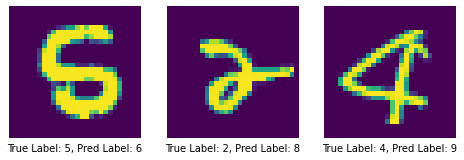

In [252]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(8,8))
gs1 = gridspec.GridSpec(1, 3)

ax1 = plt.subplot(gs1[0])
ax1.imshow(test[17].reshape(img_size, img_size))
ax2 = plt.subplot(gs1[1])
ax2.imshow(test[30].reshape(img_size, img_size))
ax3 = plt.subplot(gs1[2])
ax3.imshow(test[39].reshape(img_size, img_size))

ax1.axis('off')
ax2.axis('off')
ax3.axis('off')

ax1.text(0.5,-0.1, "True Label: 5, Pred Label: 6", size=10, ha="center", 
         transform=ax1.transAxes)
ax2.text(0.5,-0.1, "True Label: 2, Pred Label: 8", size=10, ha="center", 
         transform=ax2.transAxes)
ax3.text(0.5,-0.1, "True Label: 4, Pred Label: 9", size=10, ha="center", 
         transform=ax3.transAxes)

plt.show()

In [3]:

# with open("svm_converged.pickle", "wb") as f:
#     pickle.dump(svm_cv, f)

In [6]:
with open("svm_converged.pickle", "rb") as f:
    svm_pickle = pickle.load(f)

/home/user/notes/pattern_recognition/assignments/pattrec1/pattrec-env/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator SVC from version 1.0.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/user/notes/pattern_recognition/assignments/pattrec1/pattrec-env/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator GridSearchCV from version 1.0.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [36]:
pred_svm_pickle = svm_pickle.predict(test_digits)
acc_svm_pickle = svm_pickle.score(test_digits, test_labels) 
acc_svm_pickle # accuracy = 0.943

KeyboardInterrupt: 

In [37]:
cnf_svm_pickle = metrics.confusion_matrix(test_labels, pred_svm_pickle)
cnf_svm_pickle

NameError: name 'metrics' is not defined